# Classification of Mice Based on Protein Expression Levels
### Problem Statement:
The goal of this project is to analyze protein expression levels in the cerebral cortex of mice to classify them into different categories based on their genotype, behavior, and treatment. Specifically, the project aims to identify subsets of proteins that can discriminate between these classes and to understand the biological mechanisms underlying learning and memory, particularly in the context of Down syndrome.


### Objective:
* Classify Mice Based on Protein Expression: Develop a machine learning model to accurately classify mice into one of the eight classes based on the expression levels of 77 proteins. These classes are determined by a combination of genotype (control or trisomic), behavior (stimulated to learn or not), and treatment (saline or memantine).
* Identify Key Discriminant Proteins: Utilize feature selection techniques to identify which proteins or protein modifications are most important for distinguishing between the different classes. Understanding which proteins are key discriminators can provide insights into the biological mechanisms underlying learning and memory in Down syndrome.
* Evaluate the Impact of Genotype, Behavior, and Treatment: Analyze the effect of genotype (control vs. trisomic), behavior (context-shock vs. shock-context), and treatment (saline vs. memantine) on protein expression levels. This includes evaluating how these factors influence associative learning and the potential therapeutic effects of memantine in trisomic mice.


# Dataset Description:
The dataset consists of the expression levels of 77 proteins/protein modifications measured in the nuclear fraction of the cerebral cortex in mice. The data is collected from both control mice and trisomic (Down syndrome) mice, subjected to a context fear conditioning task to assess associative learning.

In [1]:
# Importing the libraries for dataframe, arrays, visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Code for importing files from the desktop
from google.colab import files

uploaded = files.upload()

# Importing IO to upload and read the csv file into a dataframe
import io

df = pd.read_csv(io.BytesIO(uploaded['Data_Cortex_Nuclear dataset Major project.csv']))

#df = pd.read_csv("/content/Data_Cortex_Nuclear.csv")

In [2]:
df = pd.read_csv('Data_Cortex_Nuclear.csv')

In [3]:
# Check few rows of the dataframe on columns along with label(y) as 'Class'
df.head()

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1  0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2  0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3  0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4  0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1  0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2  0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3  0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4  0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  

[5 rows x 82 columns]

### Dataset Description:
The dataset consists of the expression levels of 77 proteins/protein modifications measured in the nuclear fraction of the cerebral cortex in mice. The data is collected from both control mice and trisomic (Down syndrome) mice, subjected to a context fear conditioning task to assess associative learning.

### Dataset Characteristics:
* Type: Multivariate
* Subject Area: Biology
* Associated Tasks: Classification, Clustering
* Feature Type: Real
* Instances: 1080
* Features: 80

### Breakdown:
* Mice Classes: 8 (based on genotype, behavior, and treatment)
**Control Mice:
* c-CS-s: Control, Stimulated, Saline (9 mice)
* c-CS-m: Control, Stimulated, Memantine (10 mice)
* c-SC-s: Control, Not Stimulated, Saline (9 mice)
* c-SC-m: Control, Not Stimulated, Memantine (10 mice)
**Trisomic Mice:
* t-CS-s: Trisomic, Stimulated, Saline (7 mice)
* t-CS-m: Trisomic, Stimulated, Memantine (9 mice)
* t-SC-s: Trisomic, Not Stimulated, Saline (9 mice)
* t-SC-m: Trisomic, Not Stimulated, Memantine (9 mice)

In [4]:
df.shape

(1080, 82)

In [5]:
df.columns

Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')

In [6]:
unique_counts = df.nunique()

In [7]:
for col, count in unique_counts.items():
    print(f"{col}: {count}")

MouseID: 1080
DYRK1A_N: 1077
ITSN1_N: 1076
BDNF_N: 1077
NR1_N: 1077
NR2A_N: 1077
pAKT_N: 1076
pBRAF_N: 1075
pCAMKII_N: 1077
pCREB_N: 1077
pELK_N: 1077
pERK_N: 1077
pJNK_N: 1076
PKCA_N: 1077
pMEK_N: 1077
pNR1_N: 1077
pNR2A_N: 1077
pNR2B_N: 1077
pPKCAB_N: 1077
pRSK_N: 1077
AKT_N: 1077
BRAF_N: 1077
CAMKII_N: 1077
CREB_N: 1073
ELK_N: 1062
ERK_N: 1077
GSK3B_N: 1077
JNK_N: 1077
MEK_N: 1072
TRKA_N: 1075
RSK_N: 1074
APP_N: 1077
Bcatenin_N: 1062
SOD1_N: 1077
MTOR_N: 1077
P38_N: 1075
pMTOR_N: 1077
DSCR1_N: 1077
AMPKA_N: 1075
NR2B_N: 1077
pNUMB_N: 1077
RAPTOR_N: 1077
TIAM1_N: 1075
pP70S6_N: 1076
NUMB_N: 1080
P70S6_N: 1080
pGSK3B_N: 1080
pPKCG_N: 1080
CDK5_N: 1080
S6_N: 1080
ADARB1_N: 1080
AcetylH3K9_N: 1080
RRP1_N: 1080
BAX_N: 1080
ARC_N: 1080
ERBB4_N: 1079
nNOS_N: 1079
Tau_N: 1080
GFAP_N: 1079
GluR3_N: 1080
GluR4_N: 1079
IL1B_N: 1080
P3525_N: 1080
pCASP9_N: 1080
PSD95_N: 1080
SNCA_N: 1079
Ubiquitin_N: 1080
pGSK3B_Tyr216_N: 1080
SHH_N: 1080
BAD_N: 866
BCL2_N: 795
pS6_N: 1080
pCFOS_N: 1005
SYP_N: 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [9]:
# Code for finding missing values for df

missing_values = df.isnull().sum()
print(missing_values)

MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64


In [10]:
# Handling missing values for the above clinical data


# Fill missing values with the mean for numerical columns
# Mean is the average of all the values
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Fill missing values with the mode for categorical columns
# Mode value is the most frequent value among all the values
# iloc[0] is the first row of mode value for that column
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [11]:
df.isnull().sum()

MouseID      0
DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

In [12]:
df.duplicated().any()

False

In [13]:
numerical_columns

Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N',
       'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N'],
      dtype='object')

In [14]:
categorical_columns

Index(['MouseID', 'Genotype', 'Treatment', 'Behavior', 'class'], dtype='object')

In [15]:
df.describe().T

count      mean       std       min       25%       50%       75%  \
DYRK1A_N   1080.0  0.425810  0.249015  0.145327  0.288163  0.366540  0.487574   
ITSN1_N    1080.0  0.617102  0.251290  0.245359  0.473669  0.566365  0.697500   
BDNF_N     1080.0  0.319088  0.049314  0.115181  0.287650  0.316703  0.348039   
NR1_N      1080.0  2.297269  0.346810  1.330831  2.059152  2.297269  2.528035   
NR2A_N     1080.0  3.843934  0.931802  1.737540  3.160287  3.763306  4.425107   
...           ...       ...       ...       ...       ...       ...       ...   
SYP_N      1080.0  0.446073  0.066432  0.258626  0.398082  0.448459  0.490773   
H3AcK18_N  1080.0  0.169609  0.054222  0.079691  0.133969  0.169609  0.187174   
EGR1_N     1080.0  0.183135  0.036261  0.105537  0.159168  0.183135  0.196133   
H3MeK4_N   1080.0  0.205440  0.048069  0.101787  0.174271  0.205440  0.219242   
CaNA_N     1080.0  1.337784  0.317126  0.586479  1.081423  1.317441  1.585824   

                max  
DYRK1A_N   2.516367  
ITSN1_N    2.602662  
BDNF_N     0.497160  
NR1_N      3.757641  
NR2A_N     8.482553  
...             ...  
SYP_N      0.759588  
H3AcK18_N  0.479763  
EGR1_N     0.360692  
H3MeK4_N   0.413903  
CaNA_N     2.129791  

[77 rows x 8 columns]

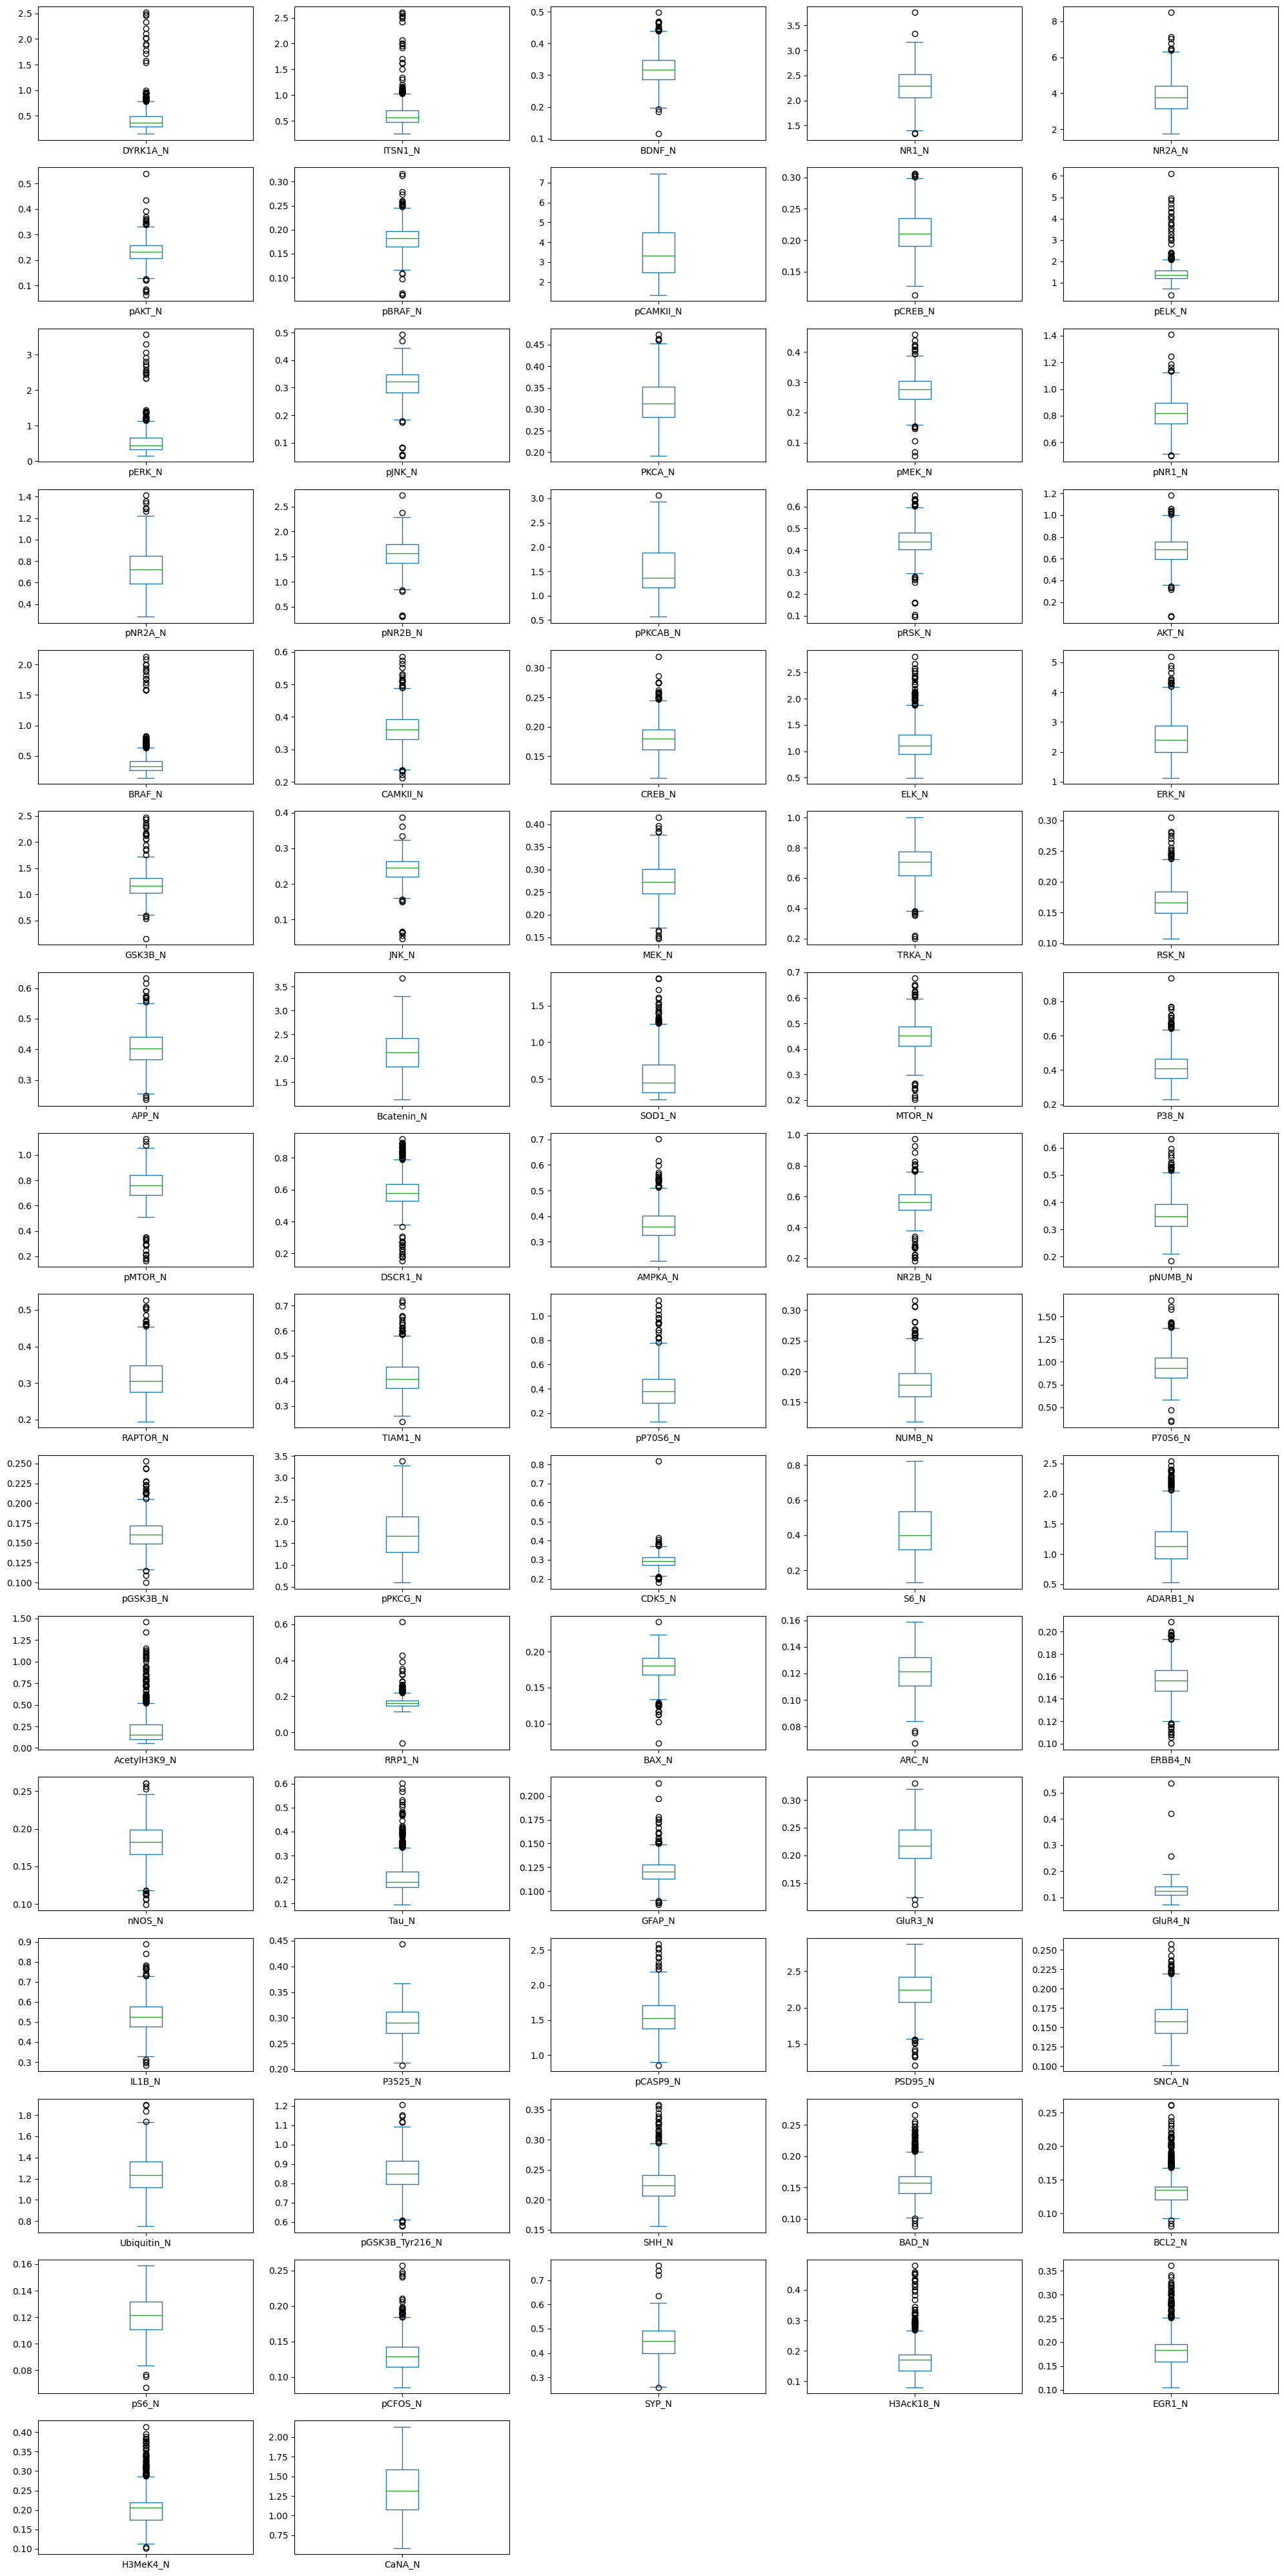

In [16]:
# Set the figure size
plt.rcParams['figure.figsize'] = (20, 40)  # Adjust size as needed

# Determine the layout
nrows = 16
ncols = 5

# Plot box plots of the numeric variables
df.plot(kind='box', subplots=True, layout=(nrows, ncols), sharex=False, sharey=False)

# Display the plots
plt.tight_layout()  # Adjust subplot parameters to give some padding
plt.show()

In [17]:
df333 = df.copy()

CLASS SEPARABILITY


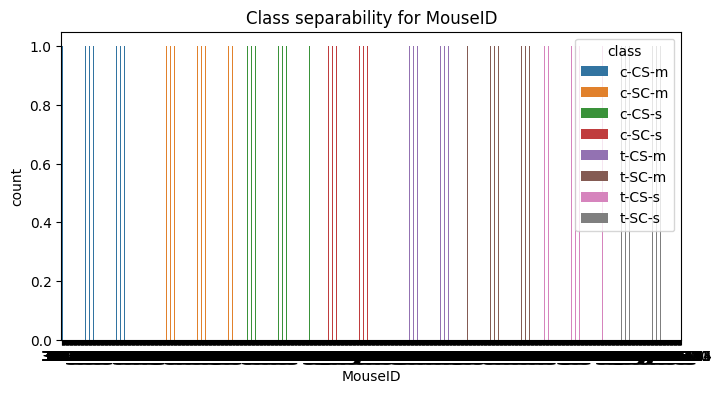

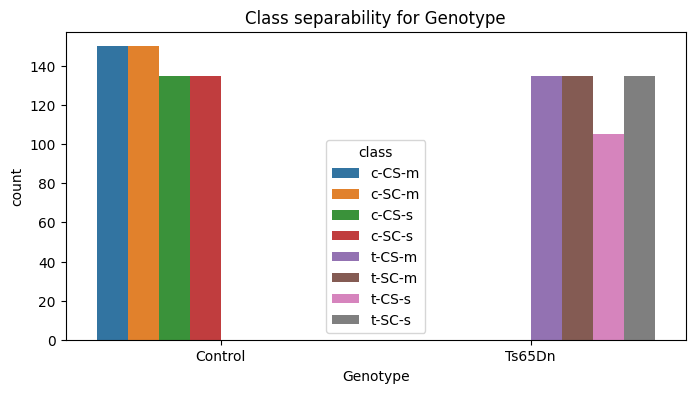

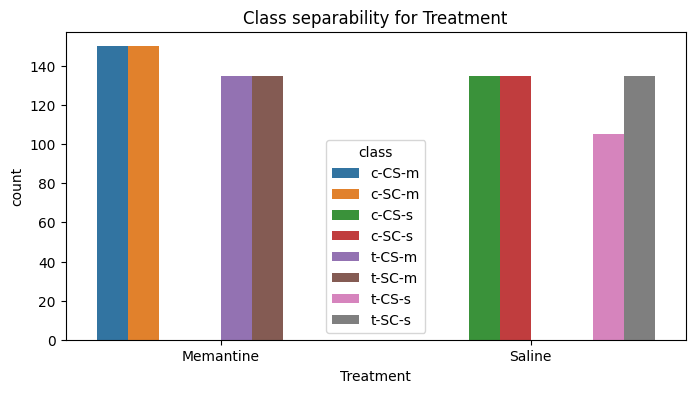

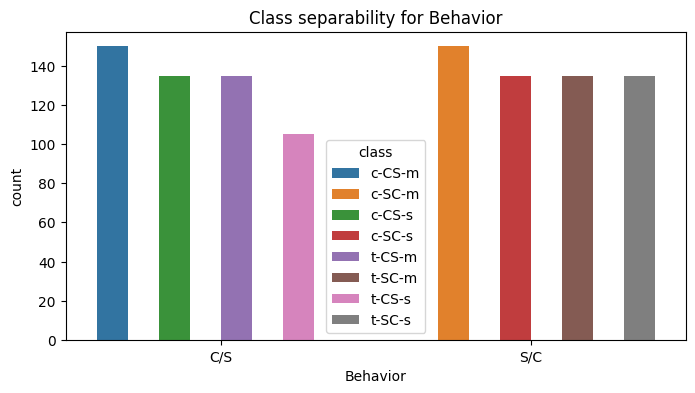

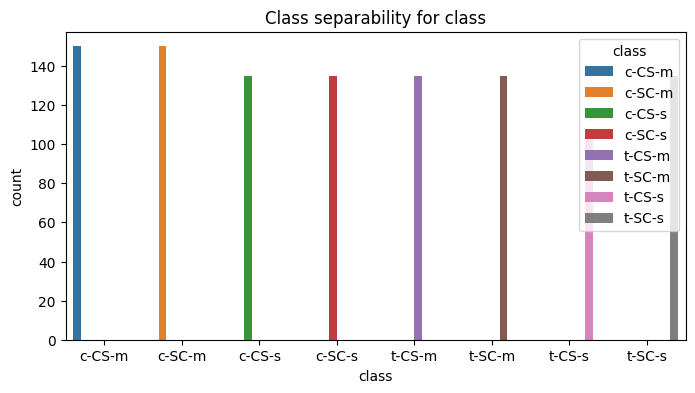

In [18]:
# Class separability for categorical variables
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='class', data=df)
    plt.title(f'Class separability for {col}')
    plt.show()


DATA DISTRIBUTION 

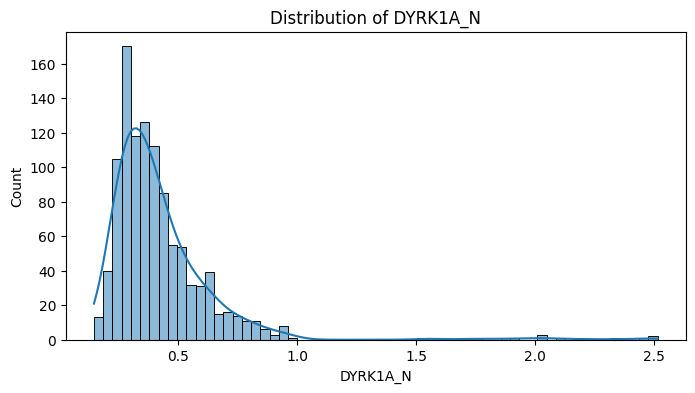

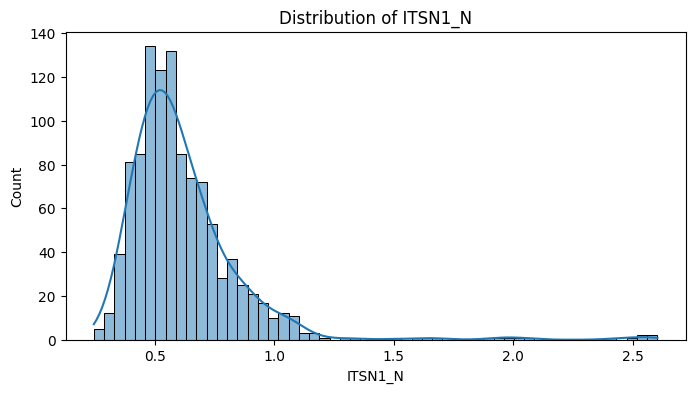

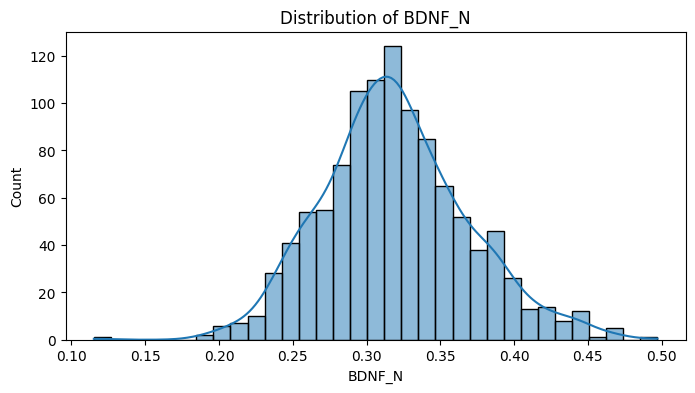

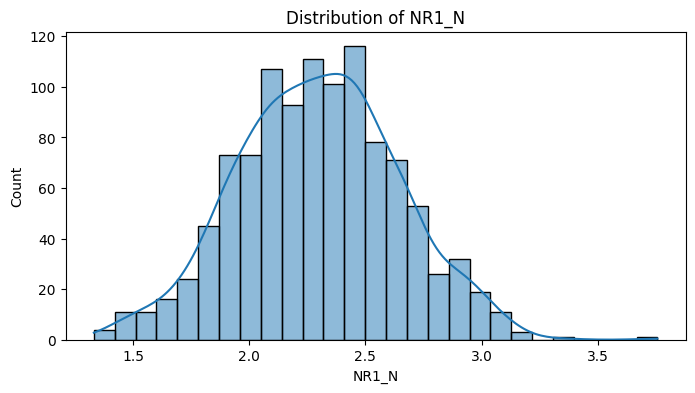

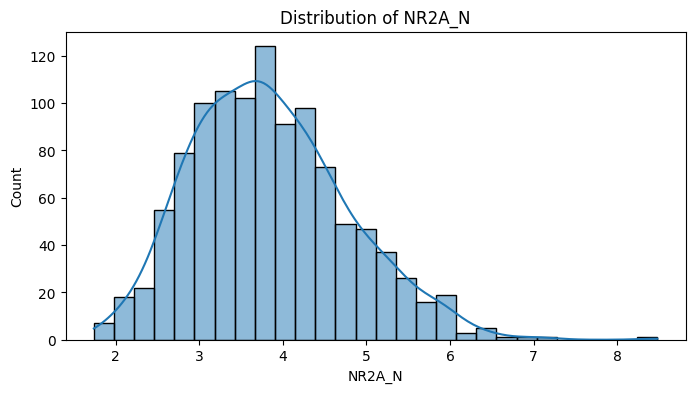

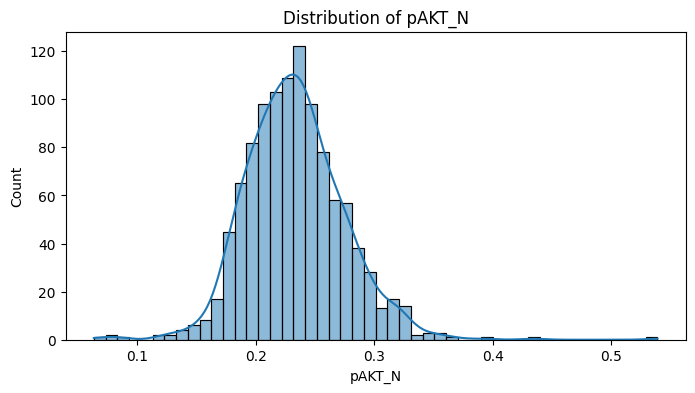

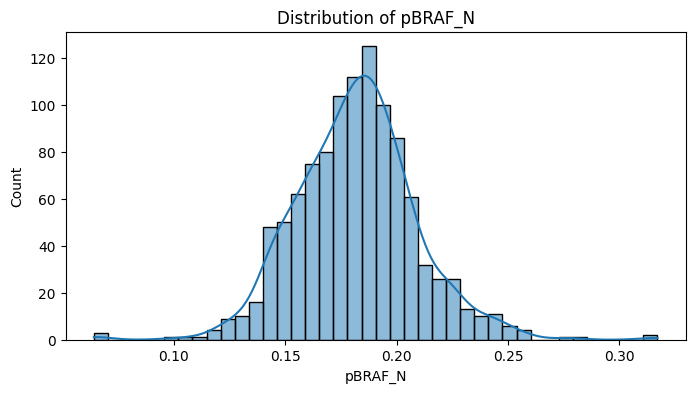

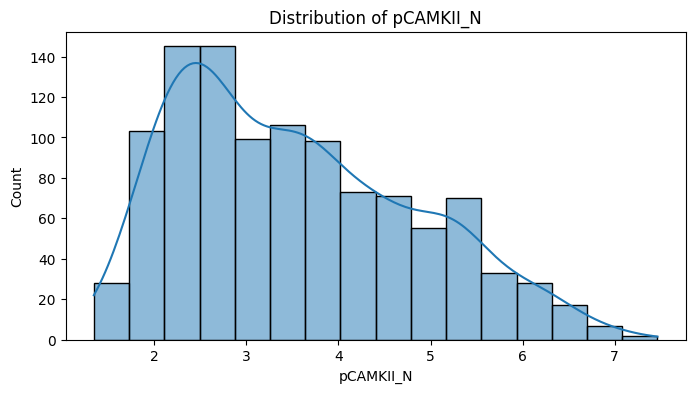

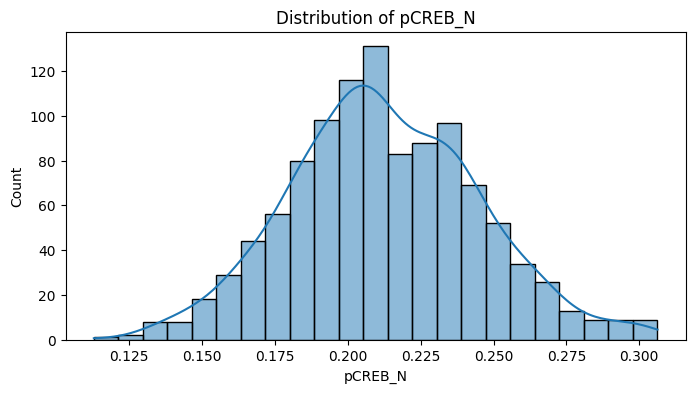

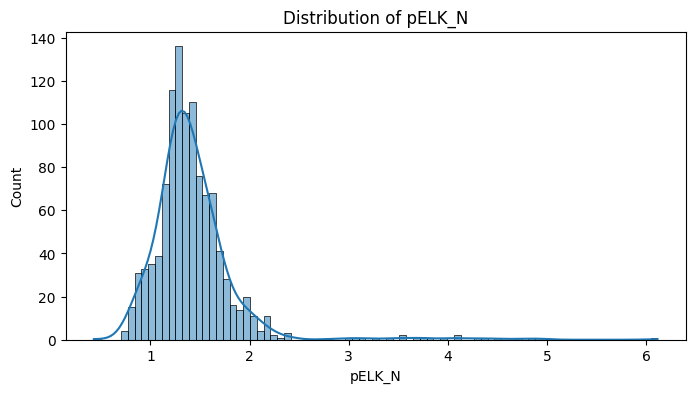

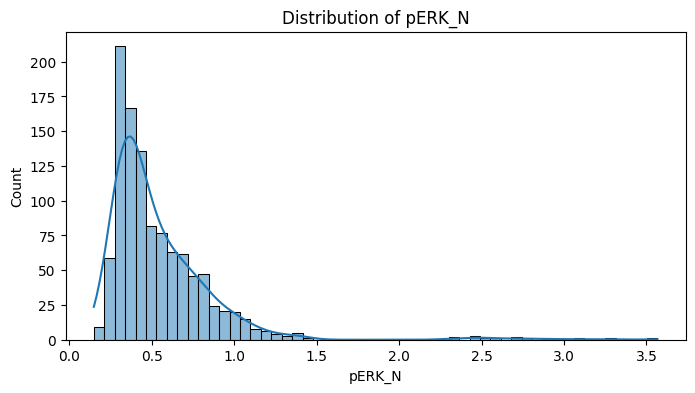

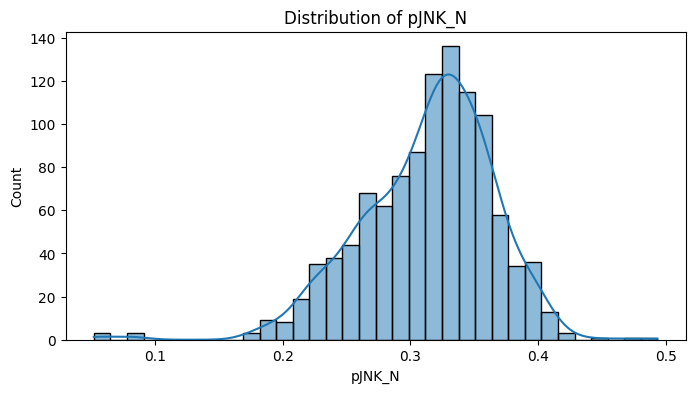

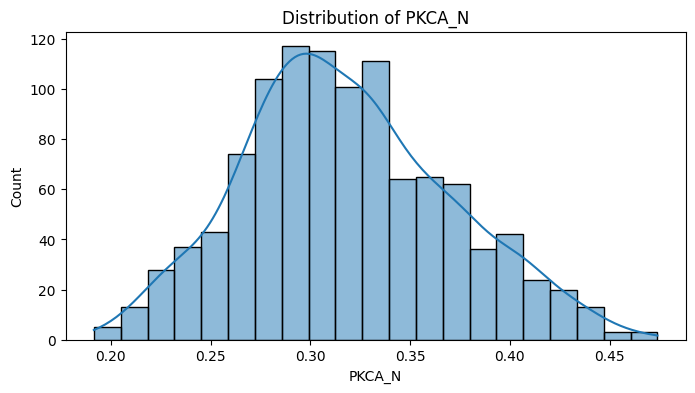

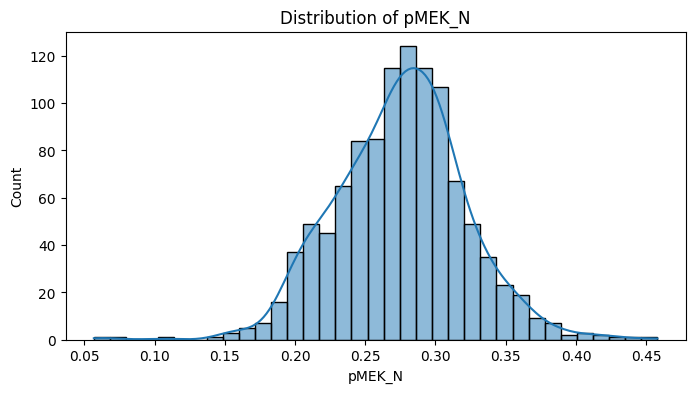

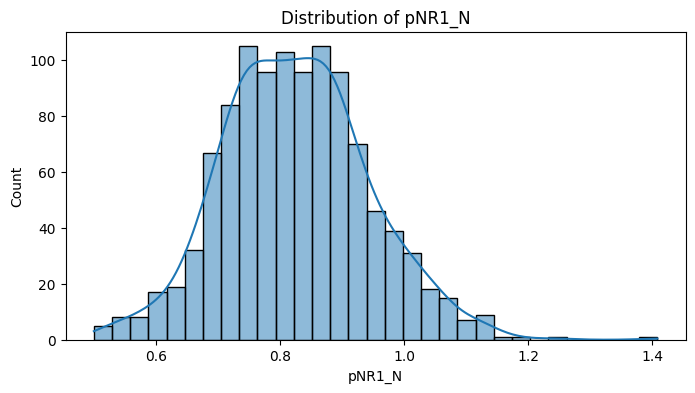

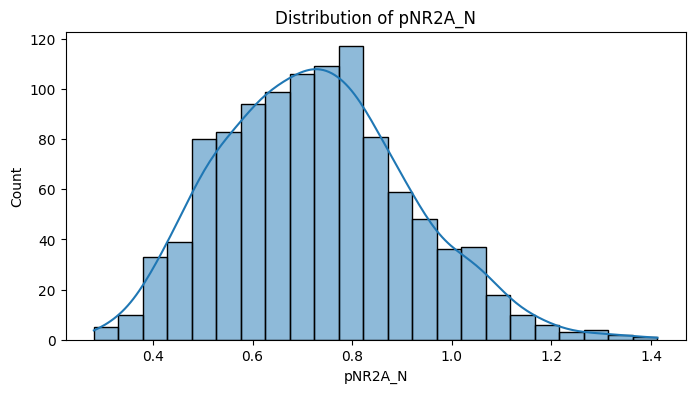

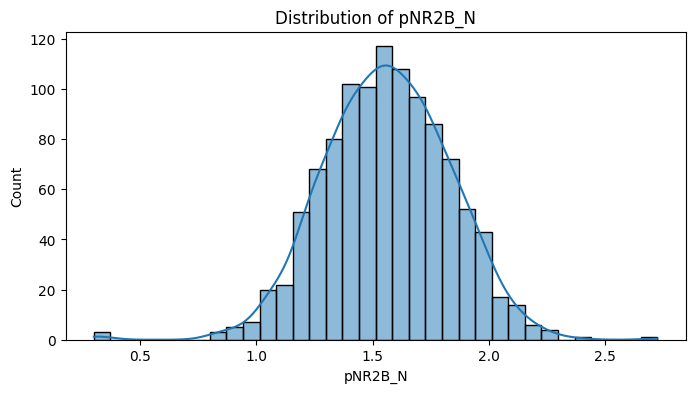

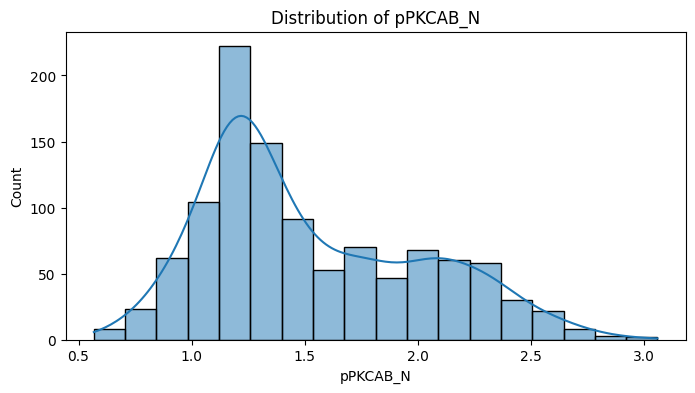

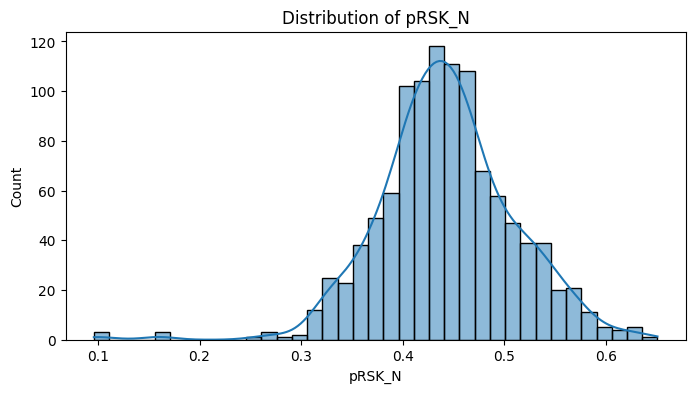

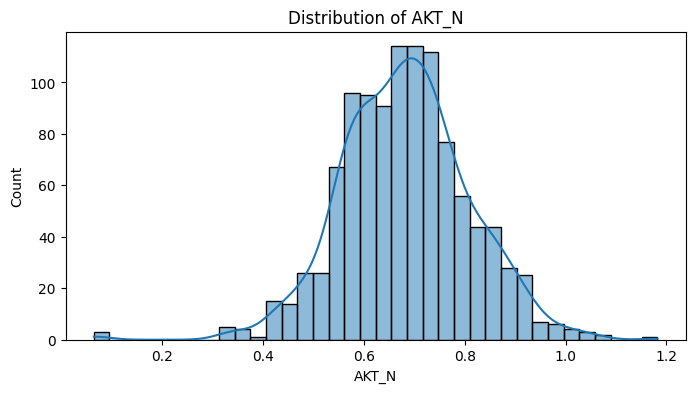

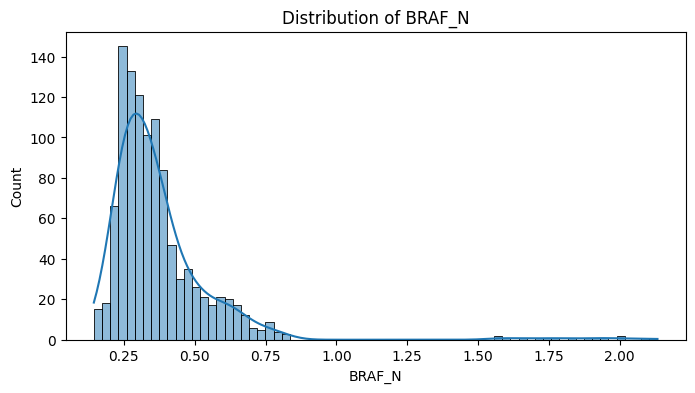

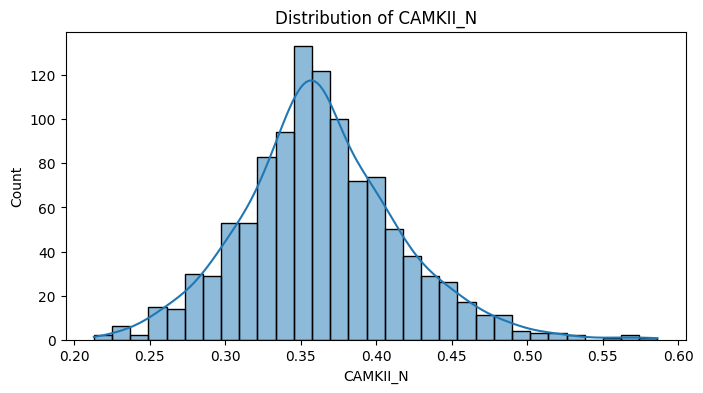

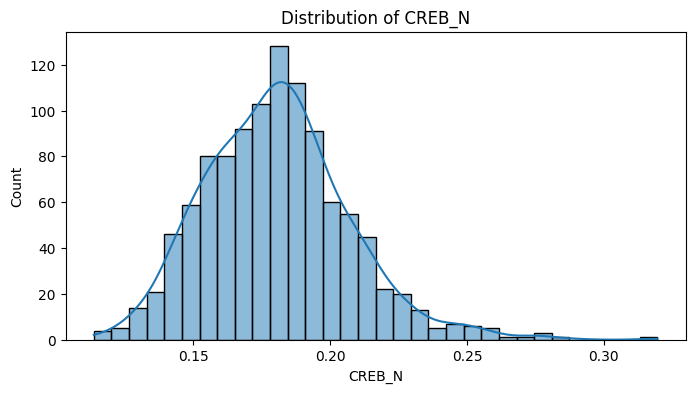

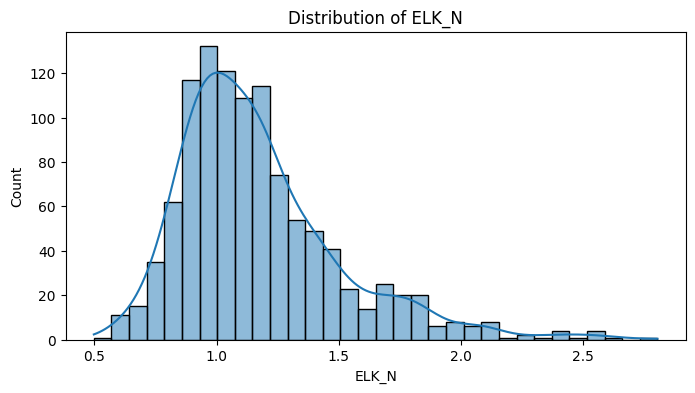

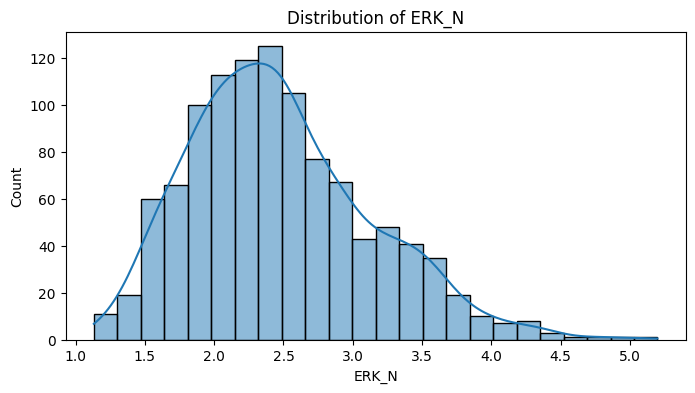

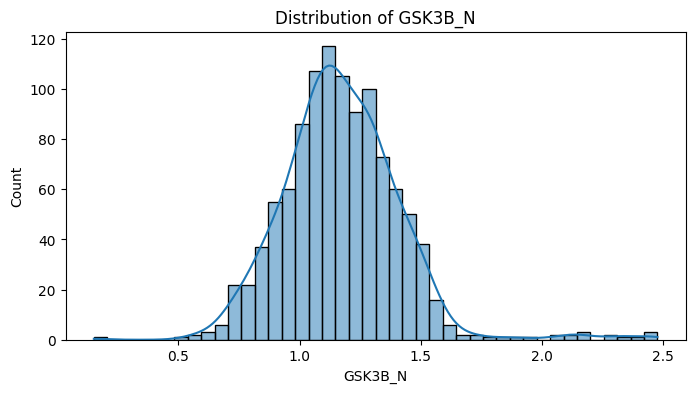

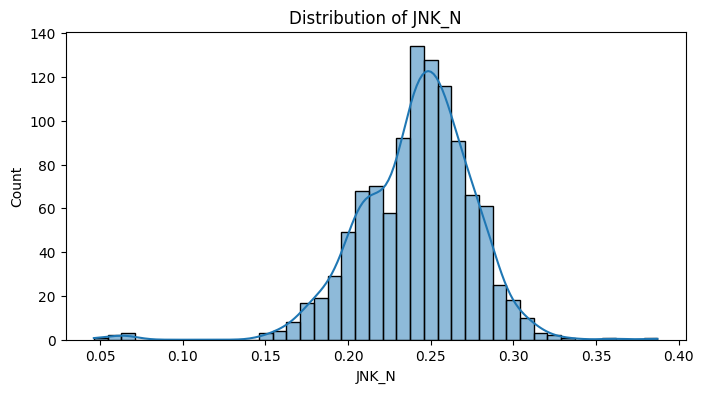

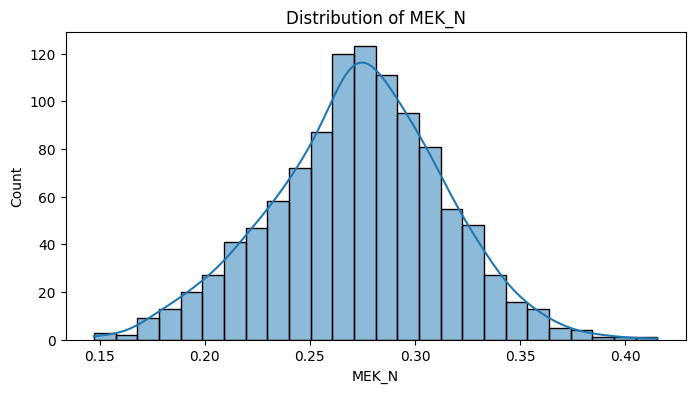

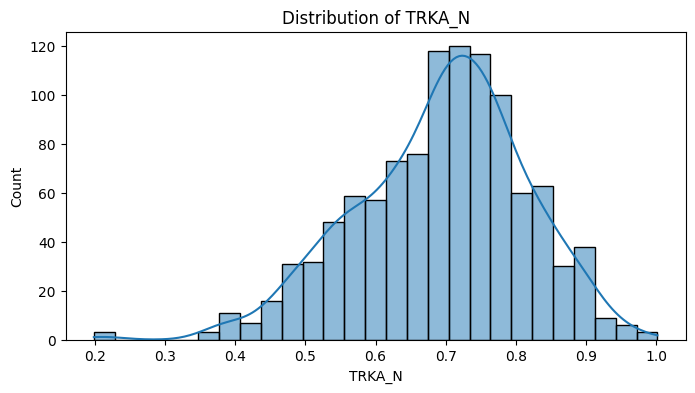

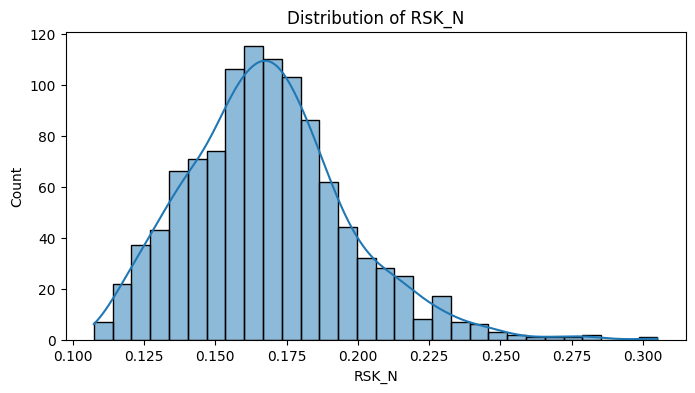

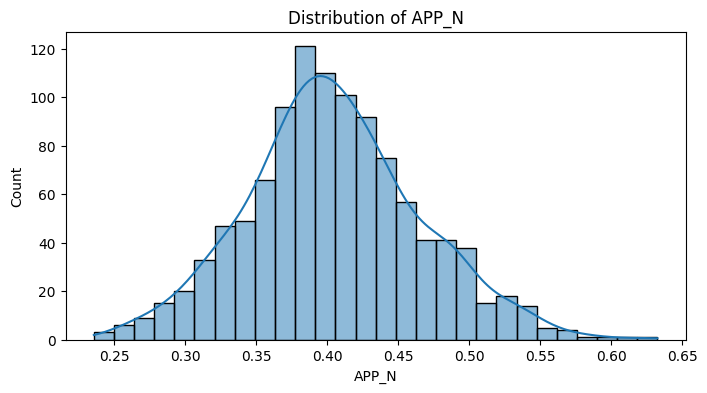

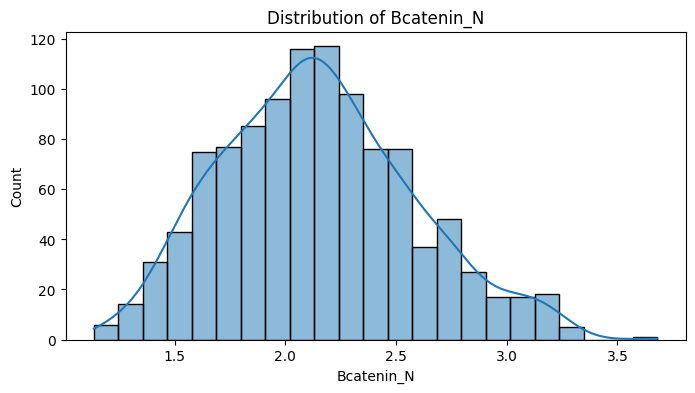

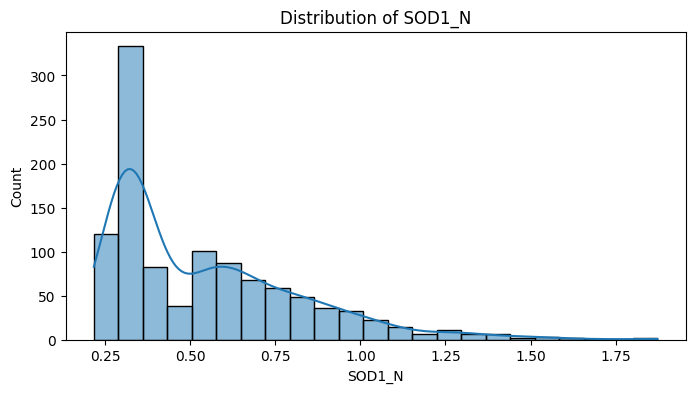

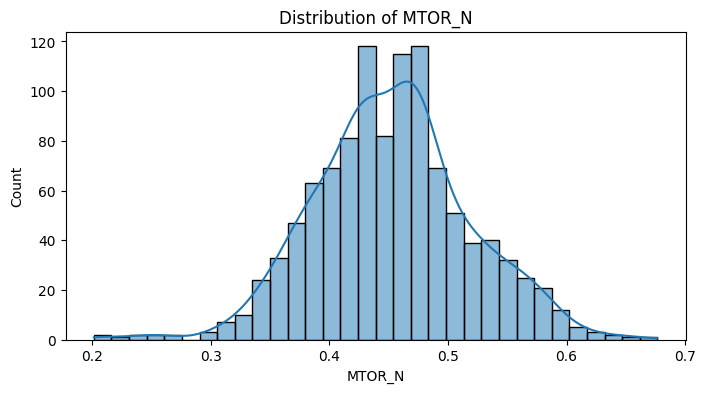

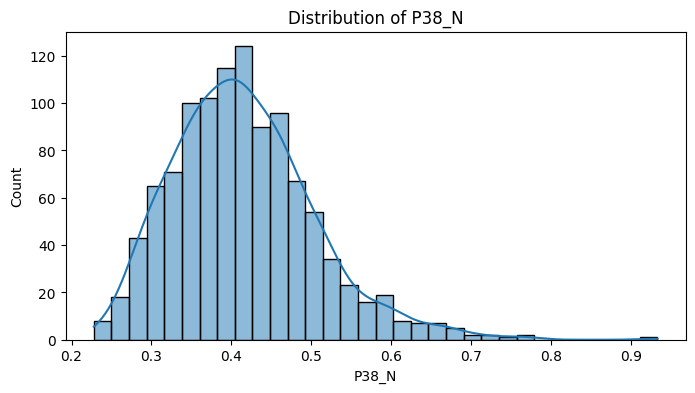

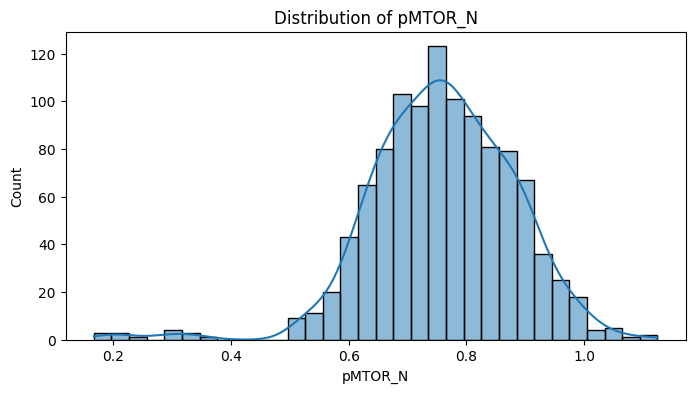

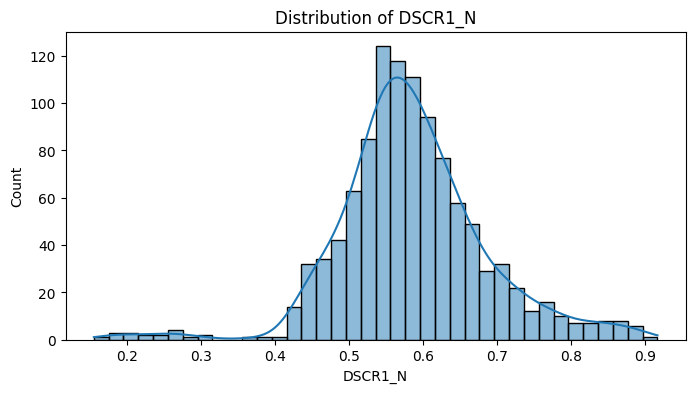

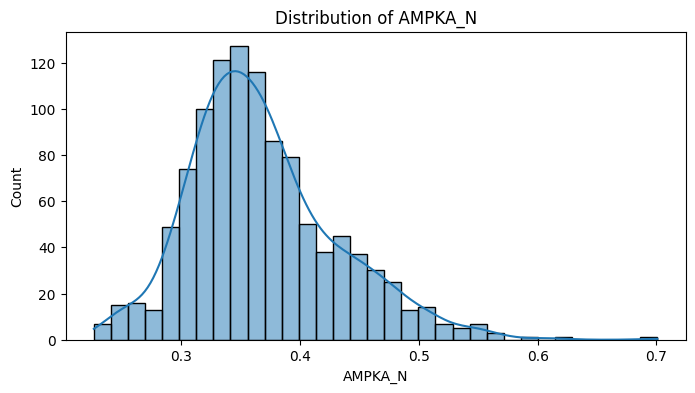

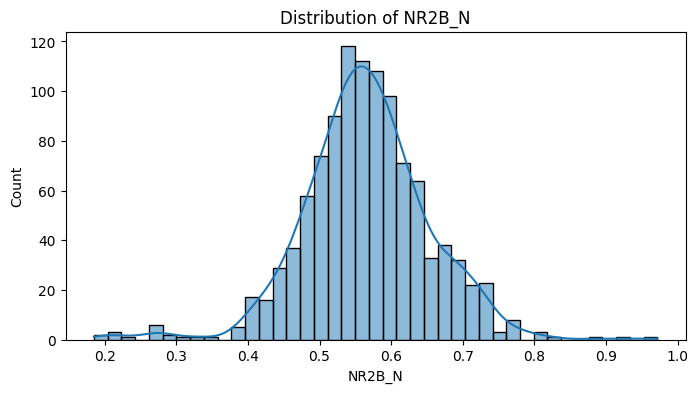

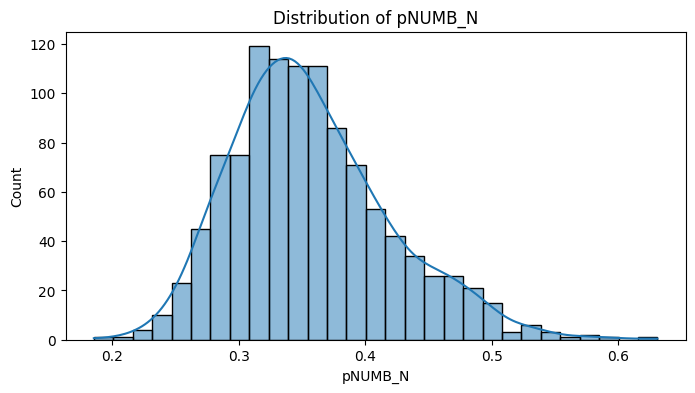

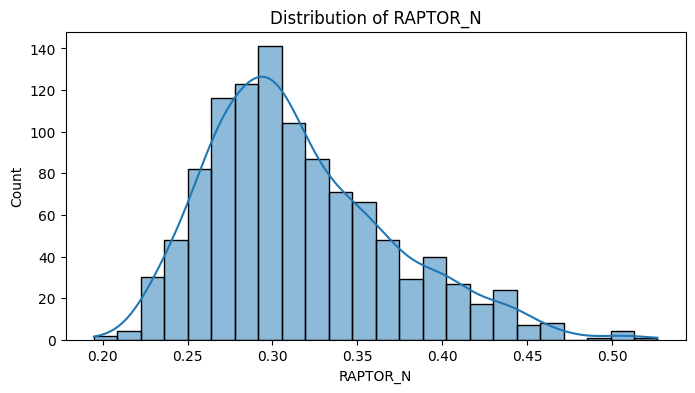

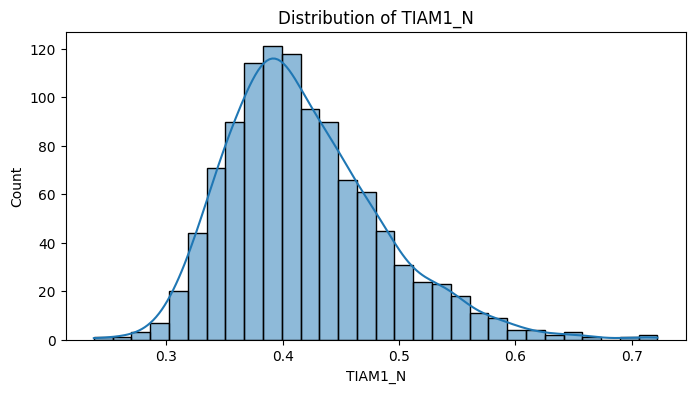

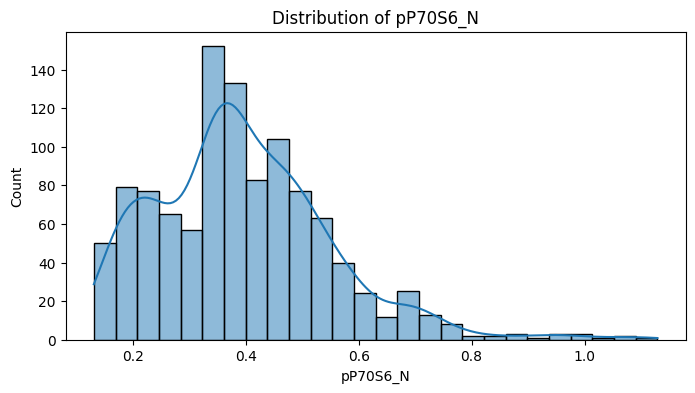

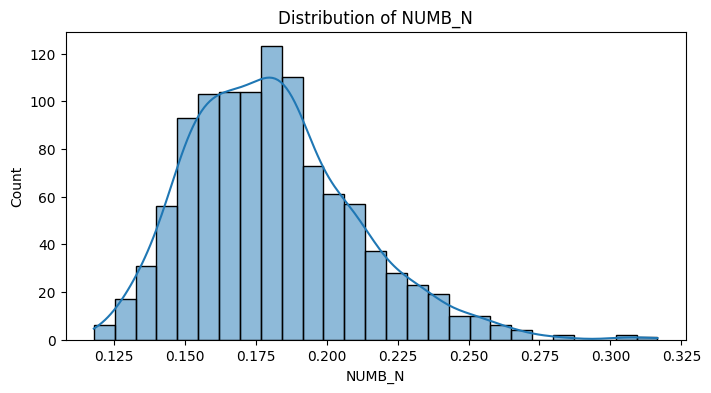

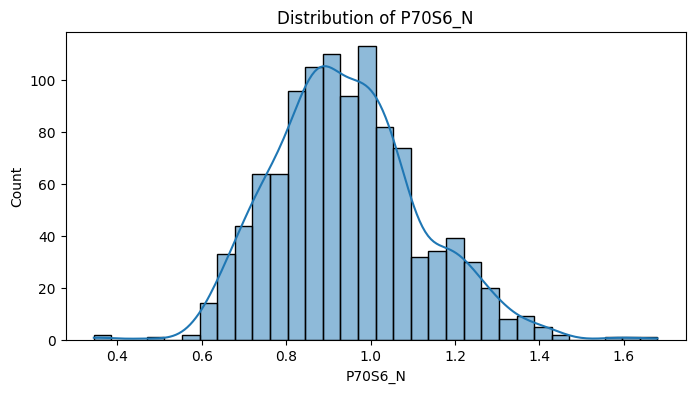

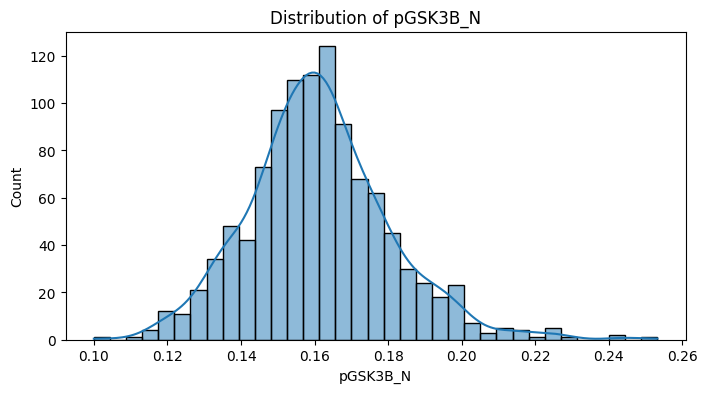

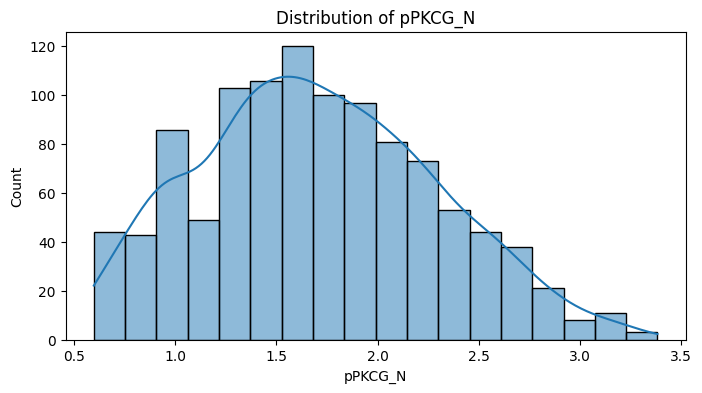

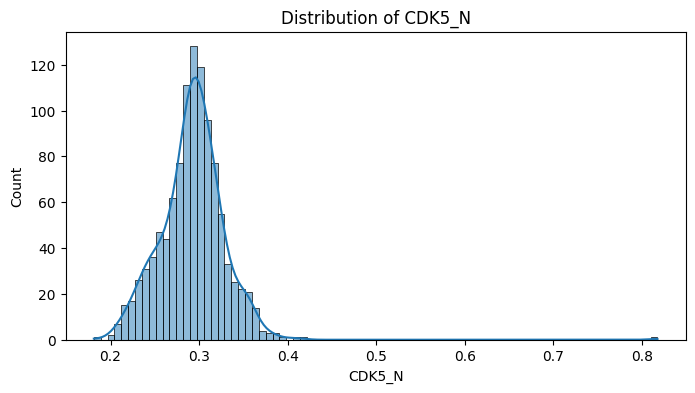

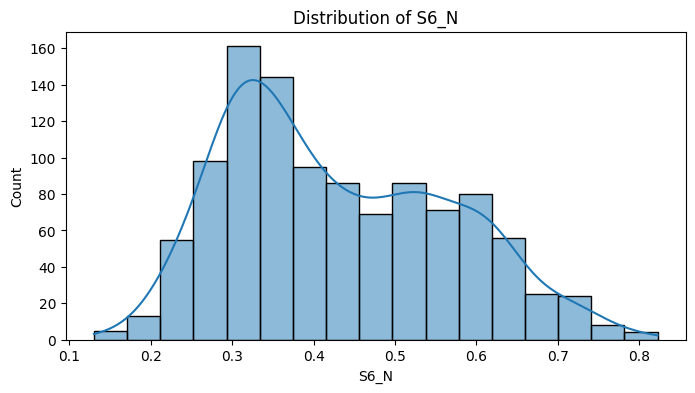

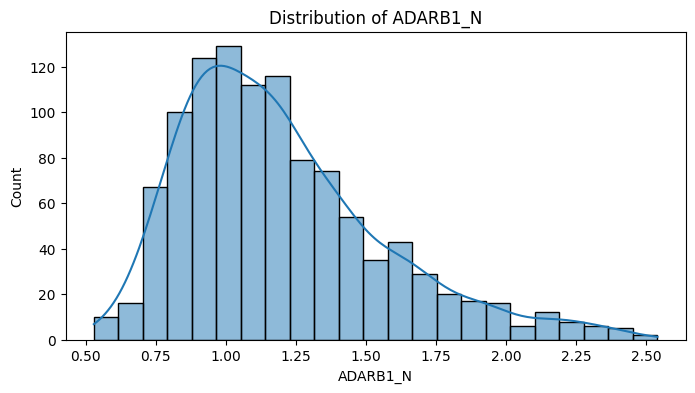

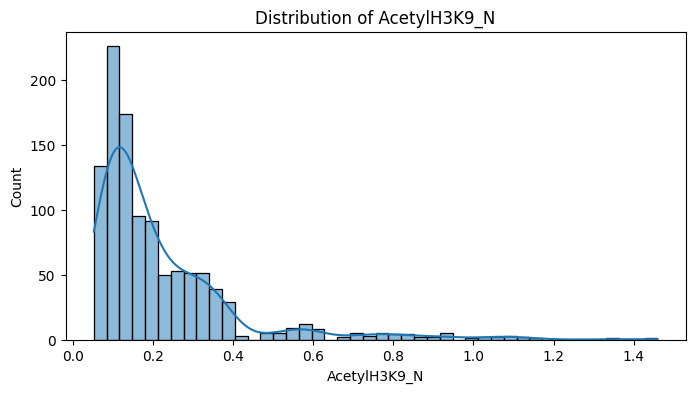

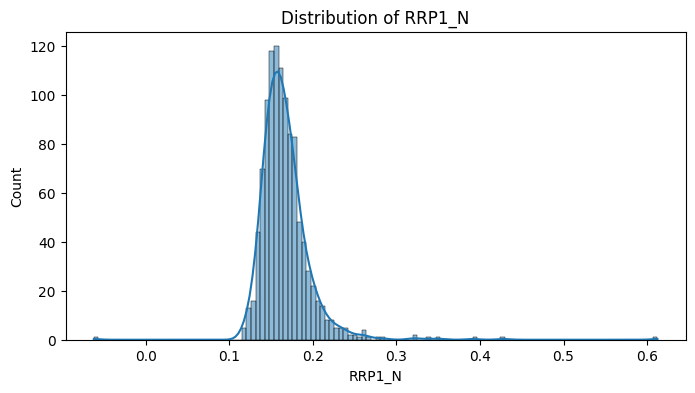

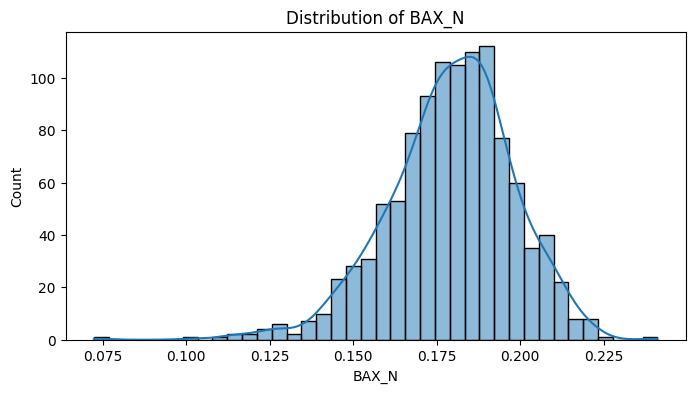

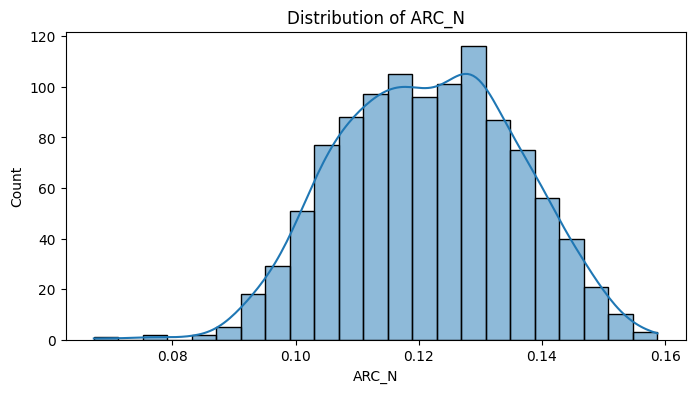

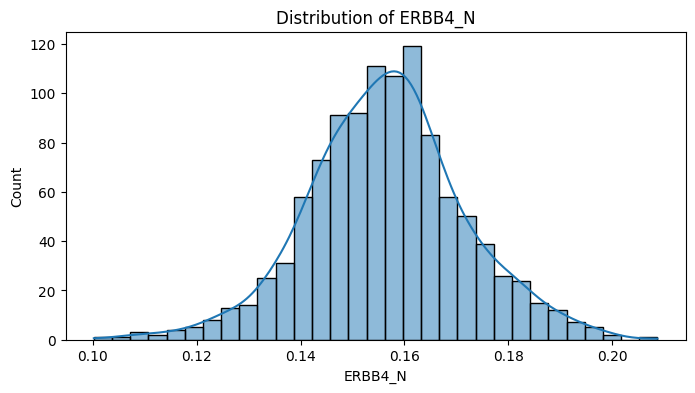

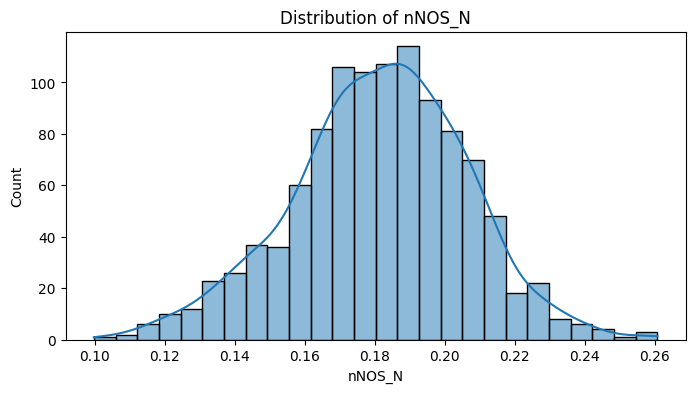

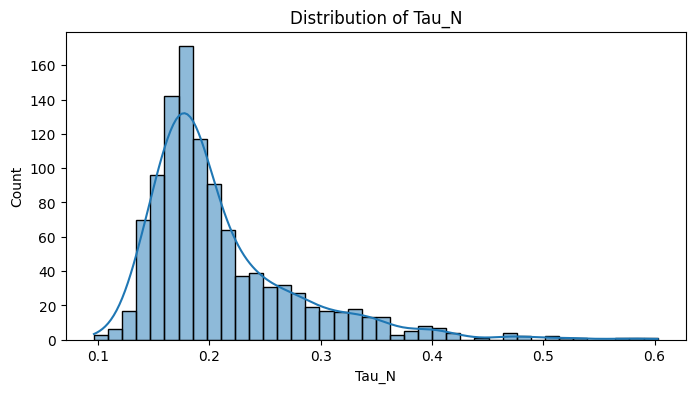

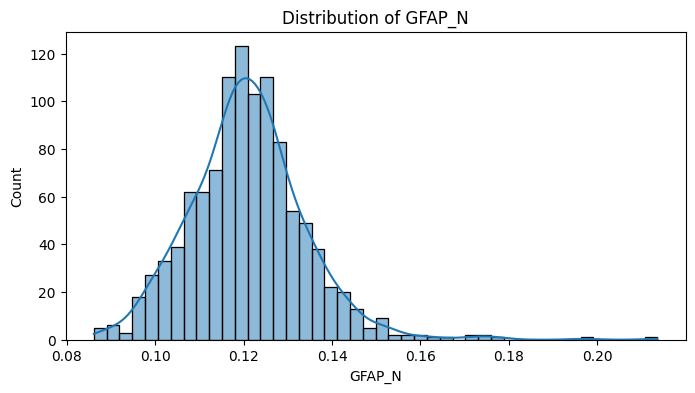

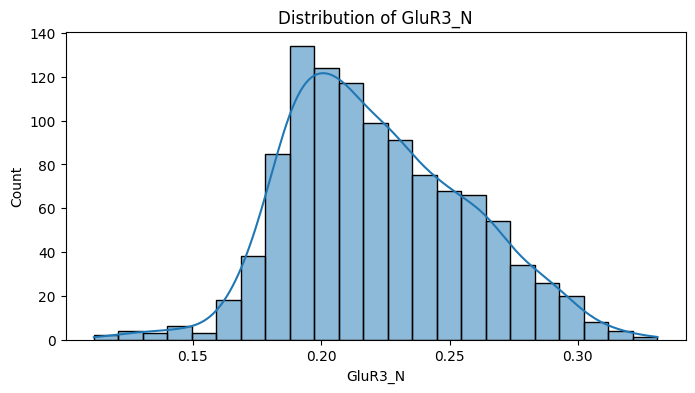

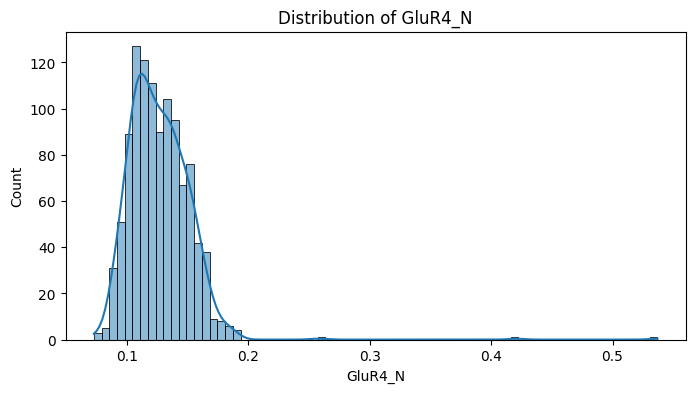

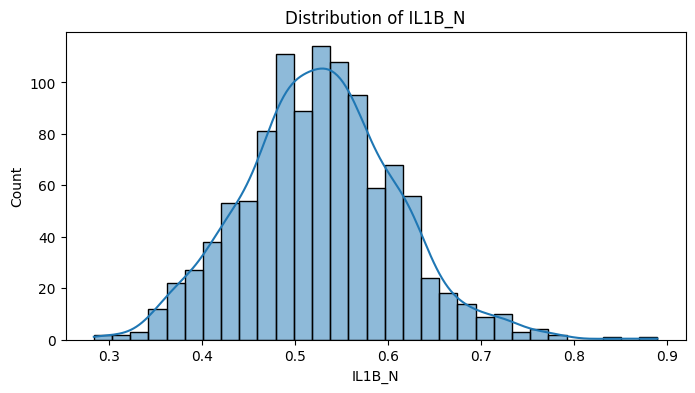

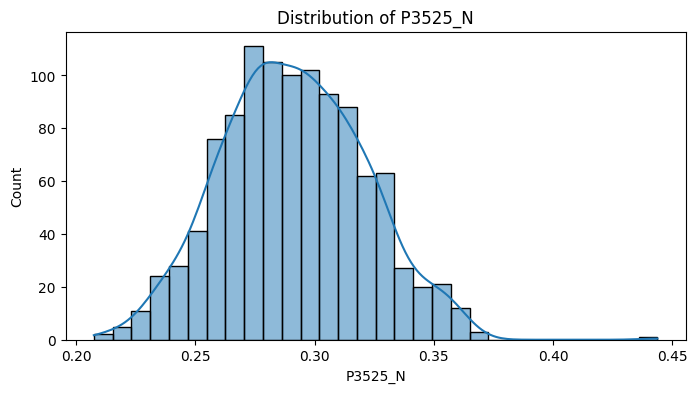

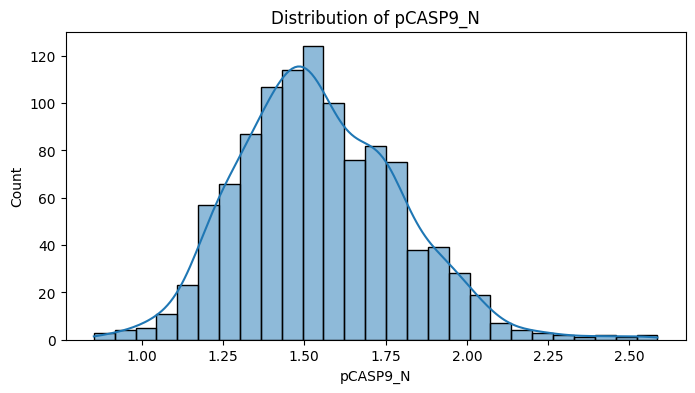

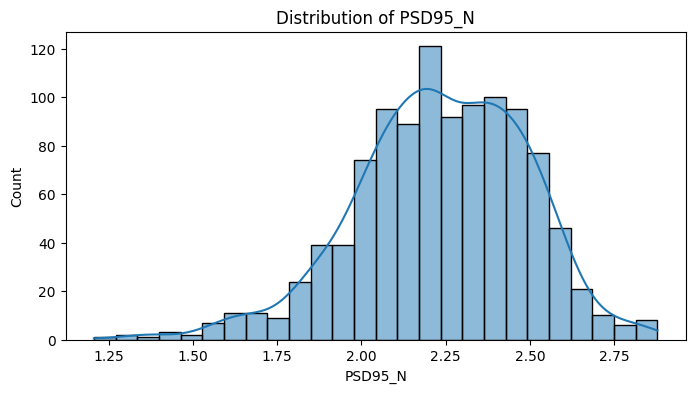

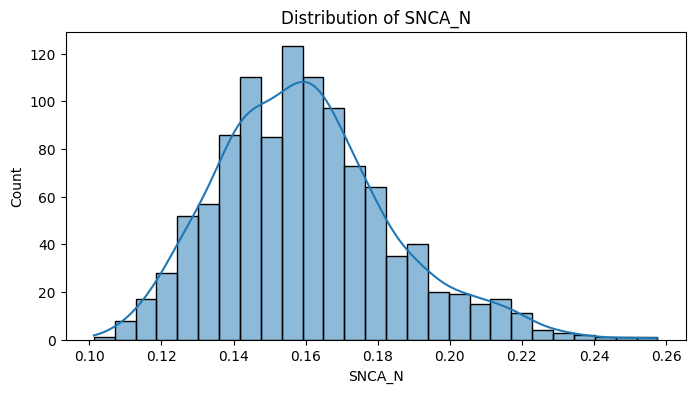

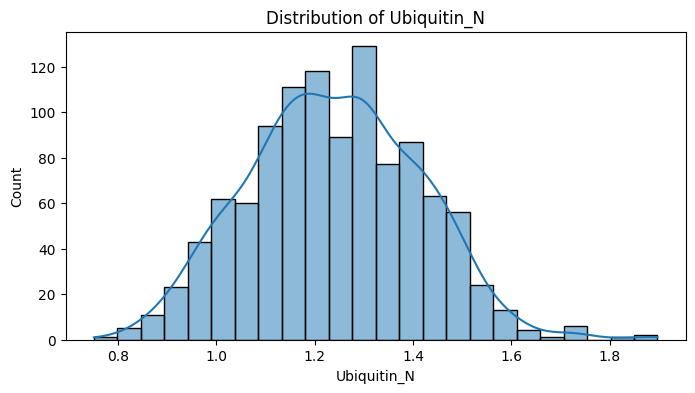

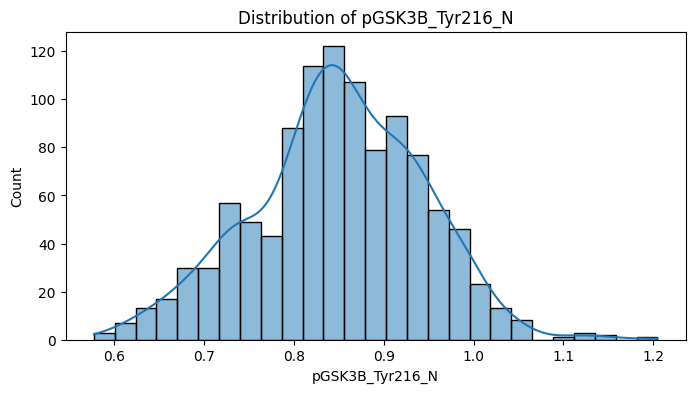

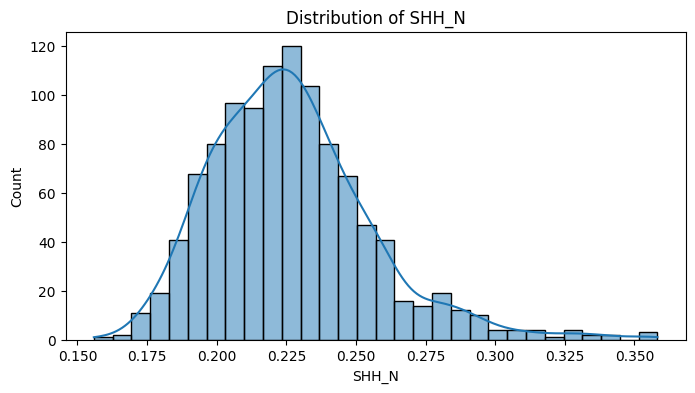

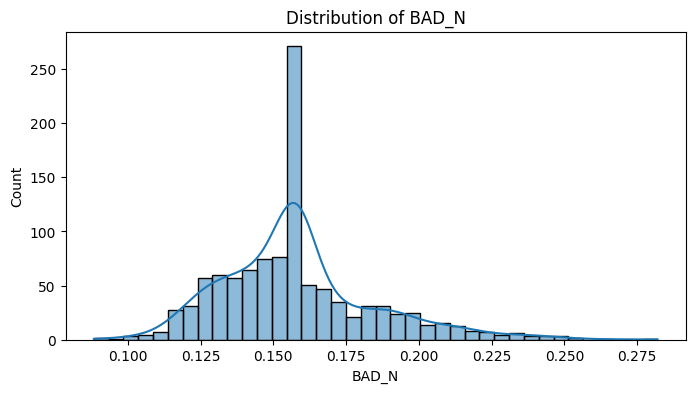

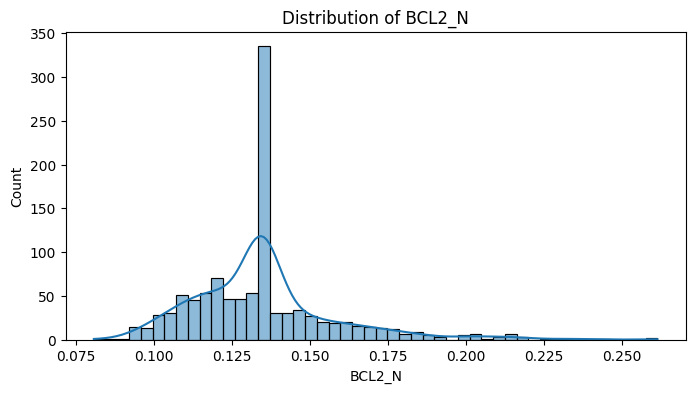

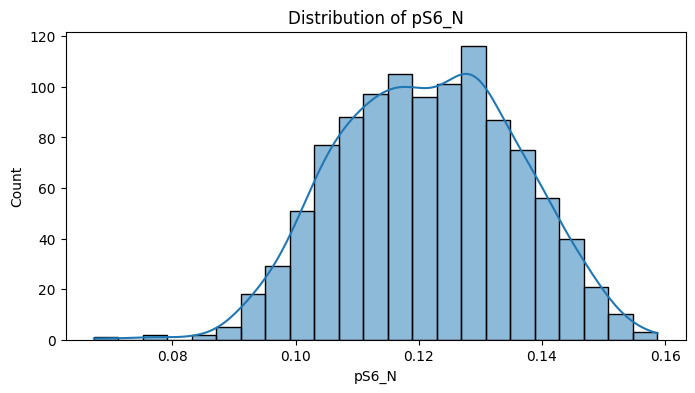

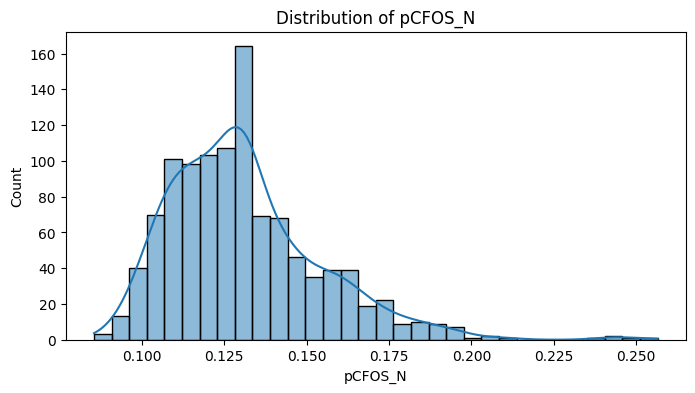

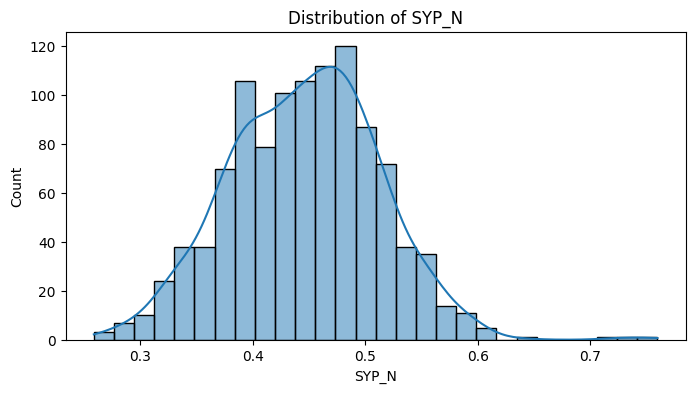

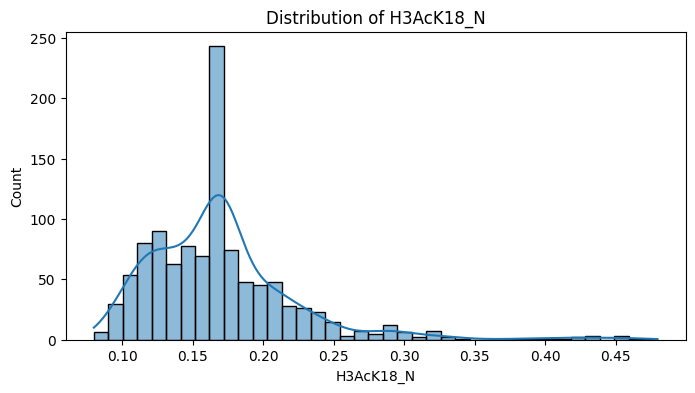

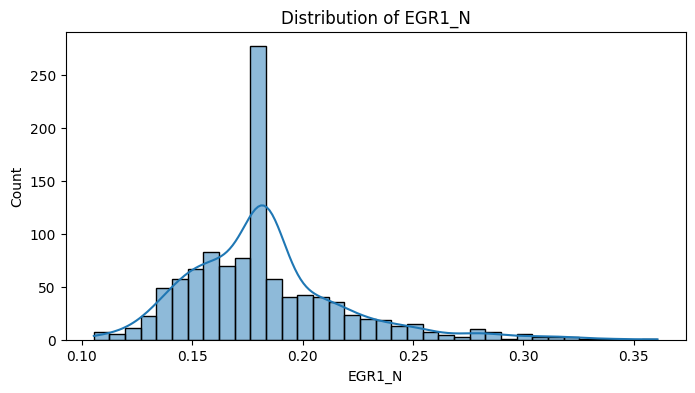

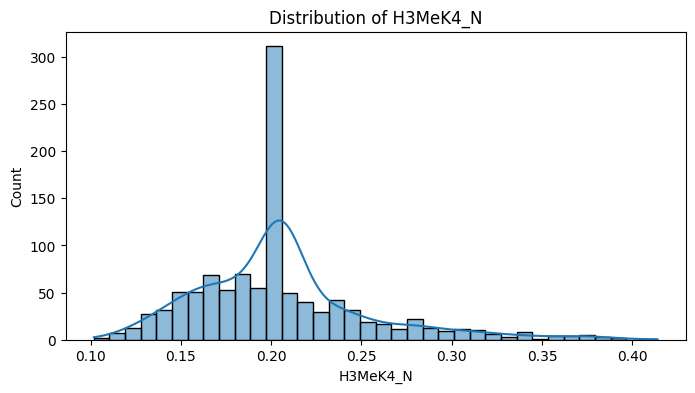

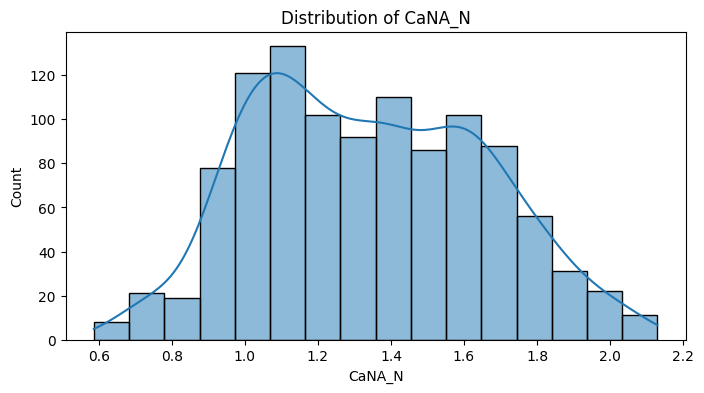

In [19]:
# Visualization of numerical variables to check the distribution of data
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()



In [20]:
df['class'].value_counts()

class
c-CS-m    150
c-SC-m    150
c-CS-s    135
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-SC-s    135
t-CS-s    105
Name: count, dtype: int64

In [21]:
df['class'].value_counts()/np.float64(len(df))

class
c-CS-m    0.138889
c-SC-m    0.138889
c-CS-s    0.125000
c-SC-s    0.125000
t-CS-m    0.125000
t-SC-m    0.125000
t-SC-s    0.125000
t-CS-s    0.097222
Name: count, dtype: float64

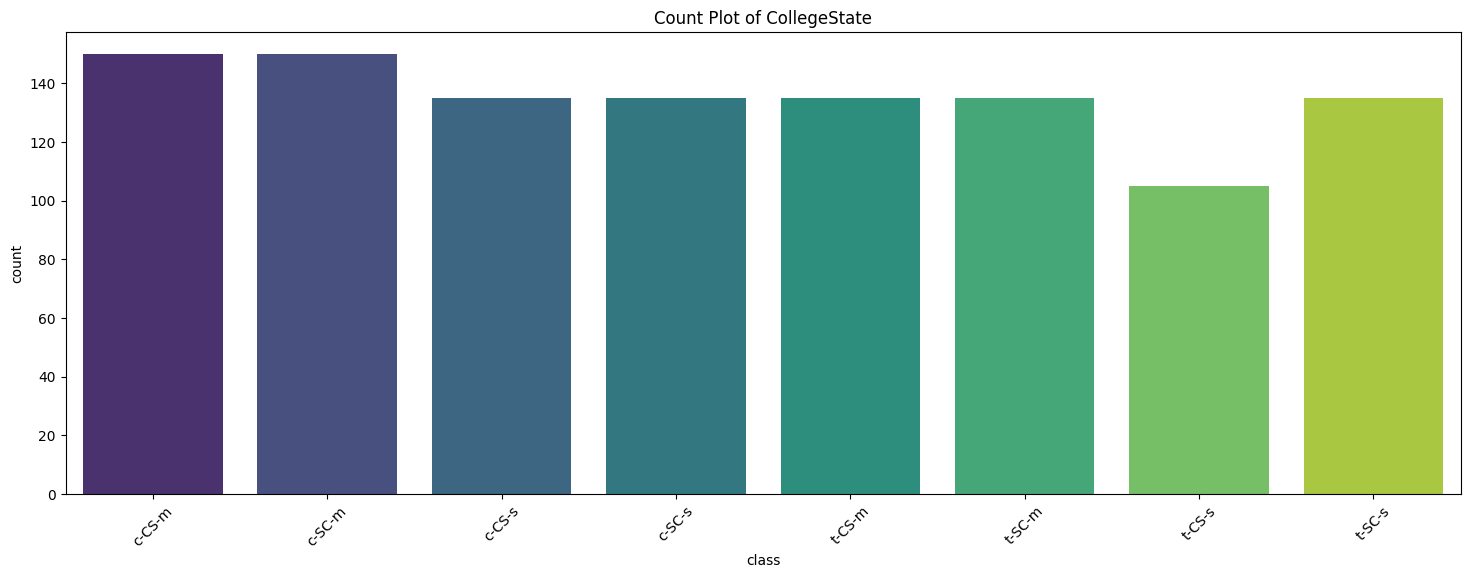

In [22]:
plt.figure(figsize=(18, 6))

sns.countplot(x='class', data=df, palette = 'viridis')
plt.title('Count Plot of CollegeState')
plt.xticks(rotation=45)
plt.show()

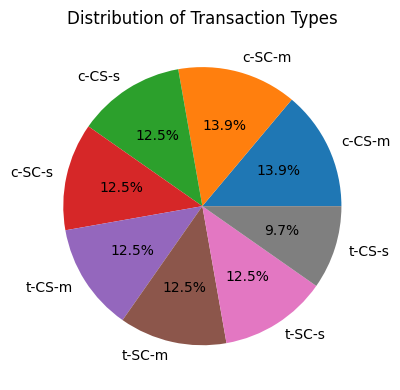

In [23]:
df['class'].value_counts()

type_counts = df['class'].value_counts()
plt.figure(figsize=(8, 4))
plt.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Transaction Types')
plt.tight_layout()
plt.show()

In [24]:
# Ordinal encoding for 'mouseid' and one-hot encoding for other 3 categorical variables, binary encoding for 'class'

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

# Ordinal encoding for 'mouseid'
encoder_mouseid = OrdinalEncoder()
df['MouseID'] = encoder_mouseid.fit_transform(df[['MouseID']])

# One-hot encoding for other 4 categorical variables
encoder_onehot = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_data = encoder_onehot.fit_transform(df[['Genotype', 'Treatment', 'Behavior']])

# Create new columns for the encoded data
encoded_data_columns = encoder_onehot.get_feature_names_out(['Genotype', 'Treatment', 'Behavior'])
df[encoded_data_columns] = encoded_data

# Drop the original categorical columns
df.drop(['Genotype', 'Treatment', 'Behavior'], axis=1, inplace=True)

# Create a LabelEncoder object as 'class' variable contains 8 different classes that are not ordinal
le = LabelEncoder()

# fit-Transform the 'Class' column using the encoder
df['class'] = le.fit_transform(df['class'])


label_encoder = LabelEncoder()
for column in ['Genotype', 'Treatment', 'Behavior', 'class']:
    data_filled[column] = label_encoder.fit_transform(df[column])

In [25]:
df.head()

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0     45.0  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1     52.0  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2     53.0  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3     54.0  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4     55.0  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...    EGR1_N  H3MeK4_N    CaNA_N  class  \
0  0.177565   2.373744  0.232224  ...  0.131790  0.128186  1.675652      0   
1  0.172817   2.292150  0.226972  ...  0.135103  0.131119  1.743610      0   
2  0.175722   2.283337  0.230247  ...  0.133362  0.127431  1.926427      0   
3  0.176463   2.152301  0.207004  ...  0.147444  0.146901  1.700563      0   
4  0.173627   2.134014  0.192158  ...  0.140314  0.148380  1.839730      0   

   Genotype_Control  Genotype_Ts65Dn  Treatment_Memantine  Treatment_Saline  \
0               1.0              0.0                  1.0               0.0   
1               1.0              0.0                  1.0               0.0   
2               1.0              0.0                  1.0               0.0   
3               1.0              0.0                  1.0               0.0   
4               1.0              0.0                  1.0               0.0   

   Behavior_C/S  Behavior_S/C  
0           1.0           0.0  
1           1.0           0.0  
2           1.0           0.0  
3           1.0           0.0  
4           1.0           0.0  

[5 rows x 85 columns]

In [26]:
df.sample(30)

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
785     821.0  0.338066  0.562234  0.301783  2.600568  4.394542  0.245938   
137     773.0  0.767988  0.945994  0.431229  2.762278  4.456110  0.219856   
979     355.0  0.440089  0.711654  0.347260  2.367210  3.683957  0.241169   
11       48.0  0.364154  0.499411  0.355124  2.006871  3.466627  0.216333   
1073   1079.0  0.280946  0.528821  0.299645  2.290991  3.243548  0.246021   
82      193.0  0.485692  0.629683  0.299948  2.317768  4.150104  0.204605   
151      37.0  0.305504  0.488544  0.289044  2.495654  4.329734  0.226758   
575     176.0  0.807475  0.925253  0.334827  2.327989  4.018038  0.206437   
869     381.0  0.392590  0.521628  0.289834  1.792298  2.359737  0.218288   
644     666.0  0.490717  0.592462  0.213702  1.540847  2.053286  0.152432   
207     244.0  0.206037  0.370735  0.317257  1.853675  2.552822  0.341207   
882     469.0  0.439808  0.604712  0.243761  1.793971  2.506688  0.178279   
147     769.0  0.528070  0.654167  0.312939  2.129825  3.501096  0.263596   
98      599.0  0.297350  0.475371  0.268154  2.095074  3.307082  0.203923   
792     814.0  0.278592  0.522287  0.307038  2.351613  3.078886  0.322287   
128     764.0  0.522925  0.757045  0.309216  2.437319  3.631074  0.269916   
121     757.0  0.762443  1.025459  0.394525  2.953580  4.820444  0.245119   
573     174.0  0.731738  0.944241  0.324365  2.320243  3.621250  0.198649   
398     959.0  0.301765  0.536569  0.298627  2.331667  3.827255  0.194020   
35       86.0  0.595904  0.861763  0.421204  2.831169  6.368257  0.233017   
157      43.0  0.293755  0.462408  0.294577  2.421323  3.884141  0.254519   
434    1026.0  0.347810  0.469789  0.344411  1.916918  2.724698  0.311178   
1078   1070.0  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897   
1013    719.0  0.344535  0.552408  0.317011  2.355577  4.024324  0.232197   
841       7.0  0.523760  0.746212  0.324897  2.285640  4.322314  0.268767   
177     139.0  0.269688  0.408125  0.317188  2.138750  3.045000  0.314375   
719      21.0  0.209521  0.461939  0.294074  2.100917  2.607736  0.287379   
925     977.0  0.441585  0.761387  0.301582  2.342337  3.844334  0.225987   
907     973.0  0.554878  0.748556  0.271983  2.144255  3.671534  0.183087   
530     536.0  0.327989  0.557618  0.363549  2.900675  4.954677  0.237825   

       pBRAF_N  pCAMKII_N   pCREB_N  ...    EGR1_N  H3MeK4_N    CaNA_N  class  \
785   0.185834   5.979334  0.206026  ...  0.175190  0.186633  1.073215      6   
137   0.190162   3.883097  0.261951  ...  0.139702  0.137085  1.449486      0   
979   0.194578   3.719282  0.234714  ...  0.161421  0.167755  1.539376      7   
11    0.204358   1.672556  0.190224  ...  0.191862  0.195529  1.722971      0   
1073  0.195797   2.946067  0.221759  ...  0.182646  0.237009  1.297315      7   
82    0.151535   3.572320  0.163892  ...  0.160939  0.170004  1.485703      0   
151   0.164999   5.354227  0.211614  ...  0.178482  0.187050  0.982182      2   
575   0.165173   2.280123  0.217402  ...  0.119478  0.140152  1.805876      4   
869   0.169009   3.292937  0.199306  ...  0.197126  0.242415  1.641603      5   
644   0.134237   1.393799  0.142963  ...  0.187868  0.224332  1.236767      4   
207   0.250328   3.962927  0.262795  ...  0.203427  0.205440  1.135863      2   
882   0.145338   1.889599  0.176682  ...  0.193621  0.206499  1.114705      5   
147   0.197588   4.653947  0.211404  ...  0.136598  0.175645  1.430841      0   
98    0.148825   3.285821  0.167690  ...  0.145109  0.154836  1.540591      0   
792   0.231085   4.937243  0.273607  ...  0.245663  0.290640  1.248661      6   
128   0.179132   3.377304  0.193602  ...  0.169977  0.205440  1.545307      0   
121   0.186256   3.837481  0.243587  ...  0.144129  0.205440  1.633793      0   
573   0.162240   2.257041  0.203458  ...  0.115926  0.133304  1.795498      4   
398   0.154902   2.623333  0.197549  ...  0.156161  0.153726  2.067361      1  

In [27]:
# check number of classes
df['class'].unique()

array([0, 2, 1, 3, 4, 6, 5, 7])

In [28]:
# put the target dependent variable 'class' in y
y = df['class']
y

0       0
1       0
2       0
3       0
4       0
       ..
1075    7
1076    7
1077    7
1078    7
1079    7
Name: class, Length: 1080, dtype: int32

In [29]:
# Drop the target variable from df as X contains only independent variables for ML model to pick up
X = df.drop('class', axis=1)
X

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0        45.0  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1        52.0  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2        53.0  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3        54.0  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4        55.0  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
...       ...       ...       ...       ...       ...       ...       ...   
1075   1067.0  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736   
1076   1068.0  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274   
1077   1069.0  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665   
1078   1070.0  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897   
1079   1071.0  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001   

       pBRAF_N  pCAMKII_N   pCREB_N  ...  H3AcK18_N    EGR1_N  H3MeK4_N  \
0     0.177565   2.373744  0.232224  ...   0.114783  0.131790  0.128186   
1     0.172817   2.292150  0.226972  ...   0.111974  0.135103  0.131119   
2     0.175722   2.283337  0.230247  ...   0.111883  0.133362  0.127431   
3     0.176463   2.152301  0.207004  ...   0.130405  0.147444  0.146901   
4     0.173627   2.134014  0.192158  ...   0.118481  0.140314  0.148380   
...        ...        ...       ...  ...        ...       ...       ...   
1075  0.171262   2.483740  0.207317  ...   0.318782  0.204660  0.328327   
1076  0.182496   2.512737  0.216339  ...   0.325639  0.200415  0.293435   
1077  0.161435   1.989723  0.185164  ...   0.321306  0.229193  0.355213   
1078  0.173623   2.086028  0.192044  ...   0.335936  0.251317  0.365353   
1079  0.191811   2.361816  0.223632  ...   0.335062  0.252995  0.365278   

        CaNA_N  Genotype_Control  Genotype_Ts65Dn  Treatment_Memantine  \
0     1.675652               1.0              0.0                  1.0   
1     1.743610               1.0              0.0                  1.0   
2     1.926427               1.0              0.0                  1.0   
3     1.700563               1.0              0.0                  1.0   
4     1.839730               1.0              0.0                  1.0   
...        ...               ...              ...                  ...   
1075  1.364823               0.0              1.0                  0.0   
1076  1.364478               0.0              1.0                  0.0   
1077  1.430825               0.0              1.0                  0.0   
1078  1.404031               0.0              1.0                  0.0   
1079  1.370999               0.0              1.0                  0.0   

      Treatment_Saline  Behavior_C/S  Behavior_S/C  
0                  0.0           1.0           0.0  
1                  0.0           1.0           0.0  
2                  0.0           1.0           0.0  
3                  0.0           1.0           0.0  
4                  0.0           1.0           0.0  
...                ...           ...           ...  
1075               1.0           0.0           1.0  
1076               1.0           0.0           1.0  
1077               1.0           0.0           1.0  
1078               1.0           0.0           1.0  
1079               1.0           0.0           1.0  

[1080 rows x 84 columns]

In [30]:
# Feature scaling for numerical columns

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical data for scaling/Normalization
X_scaled = scaler.fit_transform(X)


X_scaled = pd.DataFrame(X_scaled, columns=X.columns) # as Standard scaler returns ndarray, we need to convert to a Dataframe

In [31]:
X_scaled.head()

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0 -1.586110  0.312711  0.517934  2.253669  1.497362  2.304365 -0.345019   
1 -1.563658  0.356798  0.286501  1.880279  1.420009  1.976769 -0.518126   
2 -1.560450  0.334966  0.450465  2.012928  1.124860  1.909149 -0.581298   
3 -1.557243  0.065474 -0.000103  0.802123  0.489481  1.219245 -0.247424   
4 -1.554035  0.036682  0.001305  0.805692  0.197652  0.939202 -0.482759   

    pBRAF_N  pCAMKII_N   pCREB_N  ...  H3AcK18_N    EGR1_N  H3MeK4_N  \
0 -0.158601  -0.899902  0.604115  ...  -1.011615 -1.416624 -1.607891   
1 -0.334523  -0.963018  0.442658  ...  -1.063458 -1.325218 -1.546844   
2 -0.226891  -0.969835  0.543335  ...  -1.065130 -1.373257 -1.623595   
3 -0.199461  -1.071196 -0.171236  ...  -0.723367 -0.984718 -1.218364   
4 -0.304516  -1.085341 -0.627671  ...  -0.943378 -1.181435 -1.187585   

     CaNA_N  Genotype_Control  Genotype_Ts65Dn  Treatment_Memantine  \
0  1.065901          0.945905        -0.945905             0.945905   
1  1.280291          0.945905        -0.945905             0.945905   
2  1.857038          0.945905        -0.945905             0.945905   
3  1.144490          0.945905        -0.945905             0.945905   
4  1.583530          0.945905        -0.945905             0.945905   

   Treatment_Saline  Behavior_C/S  Behavior_S/C  
0         -0.945905      1.028175     -1.028175  
1         -0.945905      1.028175     -1.028175  
2         -0.945905      1.028175     -1.028175  
3         -0.945905      1.028175     -1.028175  
4         -0.945905      1.028175     -1.028175  

[5 rows x 84 columns]

In [32]:
# To check if the above scaling done properly or not

# Check if the mean of each column is close to zero
print(X_scaled.mean(axis=0))

# Check if the standard deviation of each column is close to one
print(X_scaled.std(axis=0))

MouseID                0.000000e+00
DYRK1A_N               2.171103e-16
ITSN1_N               -1.907939e-16
BDNF_N                 5.921189e-16
NR1_N                 -6.579099e-16
                           ...     
Genotype_Ts65Dn        1.052656e-16
Treatment_Memantine   -7.894919e-17
Treatment_Saline       7.894919e-17
Behavior_C/S          -6.579099e-17
Behavior_S/C           6.579099e-17
Length: 84, dtype: float64
MouseID                1.000463
DYRK1A_N               1.000463
ITSN1_N                1.000463
BDNF_N                 1.000463
NR1_N                  1.000463
                         ...   
Genotype_Ts65Dn        1.000463
Treatment_Memantine    1.000463
Treatment_Saline       1.000463
Behavior_C/S           1.000463
Behavior_S/C           1.000463
Length: 84, dtype: float64


In [33]:
df11 = X_scaled

In [34]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 84 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MouseID              1080 non-null   float64
 1   DYRK1A_N             1080 non-null   float64
 2   ITSN1_N              1080 non-null   float64
 3   BDNF_N               1080 non-null   float64
 4   NR1_N                1080 non-null   float64
 5   NR2A_N               1080 non-null   float64
 6   pAKT_N               1080 non-null   float64
 7   pBRAF_N              1080 non-null   float64
 8   pCAMKII_N            1080 non-null   float64
 9   pCREB_N              1080 non-null   float64
 10  pELK_N               1080 non-null   float64
 11  pERK_N               1080 non-null   float64
 12  pJNK_N               1080 non-null   float64
 13  PKCA_N               1080 non-null   float64
 14  pMEK_N               1080 non-null   float64
 15  pNR1_N               1080 non-null   f

In [35]:
df11.describe()

MouseID      DYRK1A_N       ITSN1_N        BDNF_N         NR1_N  \
count  1080.000000  1.080000e+03  1.080000e+03  1.080000e+03  1.080000e+03   
mean      0.000000  2.171103e-16 -1.907939e-16  5.921189e-16 -6.579099e-16   
std       1.000463  1.000463e+00  1.000463e+00  1.000463e+00  1.000463e+00   
min      -1.730448 -1.126894e+00 -1.480026e+00 -4.136750e+00 -2.787944e+00   
25%      -0.865224 -5.530238e-01 -5.710522e-01 -6.377946e-01 -6.869100e-01   
50%       0.000000 -2.381293e-01 -2.020004e-01 -4.839880e-02  0.000000e+00   
75%       0.865224  2.481466e-01  3.200908e-01  5.873320e-01  6.657037e-01   
max       1.730448  8.399194e+00  7.905131e+00  3.612614e+00  4.212825e+00   

             NR2A_N        pAKT_N       pBRAF_N     pCAMKII_N       pCREB_N  \
count  1.080000e+03  1.080000e+03  1.080000e+03  1.080000e+03  1.080000e+03   
mean  -1.315820e-17  2.565849e-16  1.111868e-15 -1.118447e-16  2.500058e-16   
std    1.000463e+00  1.000463e+00  1.000463e+00  1.000463e+00  1.000463e+00   
min   -2.261607e+00 -4.089102e+00 -4.364404e+00 -1.696445e+00 -3.067092e+00   
25%   -7.340226e-01 -6.580602e-01 -6.382551e-01 -8.178170e-01 -6.685676e-01   
50%   -8.656902e-02 -4.625165e-02  1.567793e-02 -1.604965e-01 -5.819895e-02   
75%    6.239974e-01  5.788759e-01  5.697940e-01  7.298624e-01  6.758712e-01   
max    4.980423e+00  7.360485e+00  5.009606e+00  3.037636e+00  2.879896e+00   

       ...     H3AcK18_N        EGR1_N      H3MeK4_N        CaNA_N  \
count  ...  1.080000e+03  1.080000e+03  1.080000e+03  1.080000e+03   
mean   ... -3.157968e-16  7.894919e-16  2.631640e-16 -1.052656e-16   
std    ...  1.000463e+00  1.000463e+00  1.000463e+00  1.000463e+00   
min    ... -1.659116e+00 -2.140954e+00 -2.157326e+00 -2.370201e+00   
25%    ... -6.576060e-01 -6.612472e-01 -6.487204e-01 -8.087621e-01   
50%    ...  0.000000e+00  7.657920e-16  5.776781e-16 -6.417740e-02   
75%    ...  3.240854e-01  3.586435e-01  2.872745e-01  7.825111e-01   
max    ...  5.722766e+00  4.898913e+00  4.338753e+00  2.498608e+00   

       Genotype_Control  Genotype_Ts65Dn  Treatment_Memantine  \
count      1.080000e+03     1.080000e+03         1.080000e+03   
mean      -1.052656e-16     1.052656e-16        -7.894919e-17   
std        1.000463e+00     1.000463e+00         1.000463e+00   
min       -1.057188e+00    -9.459053e-01        -1.057188e+00   
25%       -1.057188e+00    -9.459053e-01        -1.057188e+00   
50%        9.459053e-01    -9.459053e-01         9.459053e-01   
75%        9.459053e-01     1.057188e+00         9.459053e-01   
max        9.459053e-01     1.057188e+00         9.459053e-01   

       Treatment_Saline  Behavior_C/S  Behavior_S/C  
count      1.080000e+03  1.080000e+03  1.080000e+03  
mean       7.894919e-17 -6.579099e-17  6.579099e-17  
std        1.000463e+00  1.000463e+00  1.000463e+00  
min       -9.459053e-01 -9.725975e-01 -1.028175e+00  
25%       -9.459053e-01 -9.725975e-01 -1.028175e+00  
50%       -9.459053e-01 -9.725975e-01  9.725975e-01  
75%        1.057188e+00  1.028175e+00  9.725975e-01  
max        1.057188e+00  1.028175e+00  9.725975e-01  

[8 rows x 84 columns]

In [36]:
corr_matrix=df11.corr()

In [37]:
corr_matrix

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N  \
MouseID              1.000000  0.015398  0.057796  0.076119  0.103526   
DYRK1A_N             0.015398  1.000000  0.959512  0.359433  0.294526   
ITSN1_N              0.057796  0.959512  1.000000  0.459884  0.422492   
BDNF_N               0.076119  0.359433  0.459884  1.000000  0.805784   
NR1_N                0.103526  0.294526  0.422492  0.805784  1.000000   
...                       ...       ...       ...       ...       ...   
Genotype_Ts65Dn      0.161962  0.089425  0.173306 -0.043823 -0.110966   
Treatment_Memantine -0.210149 -0.011379 -0.031710 -0.067485 -0.067297   
Treatment_Saline     0.210149  0.011379  0.031710  0.067485  0.067297   
Behavior_C/S        -0.043452  0.505277  0.483342  0.145298  0.018795   
Behavior_S/C         0.043452 -0.505277 -0.483342 -0.145298 -0.018795   

                       NR2A_N    pAKT_N   pBRAF_N  pCAMKII_N   pCREB_N  ...  \
MouseID              0.002220  0.043019 -0.032235   0.211091  0.130023  ...   
DYRK1A_N             0.325063 -0.180959 -0.093737  -0.180169  0.047299  ...   
ITSN1_N              0.426182 -0.147775 -0.076507  -0.132870  0.171122  ...   
BDNF_N               0.749993  0.317537  0.390530   0.246760  0.603857  ...   
NR1_N                0.873889  0.211540  0.244224   0.301151  0.597443  ...   
...                       ...       ...       ...        ...       ...  ...   
Genotype_Ts65Dn     -0.159768  0.091329  0.013000   0.026109  0.171911  ...   
Treatment_Memantine  0.006264  0.131365  0.187670   0.187367 -0.081108  ...   
Treatment_Saline    -0.006264 -0.131365 -0.187670  -0.187367  0.081108  ...   
Behavior_C/S         0.112360 -0.351664 -0.317240  -0.487906 -0.237893  ...   
Behavior_S/C        -0.112360  0.351664  0.317240   0.487906  0.237893  ...   

                     H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  \
MouseID              -0.046359 -0.121108 -0.077626  0.073344   
DYRK1A_N             -0.232023 -0.317035 -0.271742  0.475930   
ITSN1_N              -0.229798 -0.387269 -0.323434  0.517669   
BDNF_N               -0.126825 -0.227111 -0.212573  0.262521   
NR1_N                -0.214029 -0.291897 -0.300814  0.205418   
...                        ...       ...       ...       ...   
Genotype_Ts65Dn       0.204164 -0.149977  0.100232  0.045850   
Treatment_Memantine   0.015482  0.089350  0.007742 -0.125451   
Treatment_Saline     -0.015482 -0.089350 -0.007742  0.125451   
Behavior_C/S         -0.322121 -0.367767 -0.364877  0.748772   
Behavior_S/C          0.322121  0.367767  0.364877 -0.748772   

                     Genotype_Control  Genotype_Ts65Dn  Treatment_Memantine  \
MouseID                     -0.161962         0.161962            -0.210149   
DYRK1A_N                    -0.089425         0.089425            -0.011379   
ITSN1_N                     -0.173306         0.173306            -0.031710   
BDNF_N                       0.043823        -0.043823            -0.067485   
NR1_N                        0.110966        -0.110966            -0.067297   
...                               ...              ...                  ...   
Genotype_Ts65Dn             -1.000000         1.000000             0.003096   
Treatment_Memantine         -0.003096         0.003096             1.000000   
Treatment_Saline             0.003096        -0.003096            -1.000000   
Behavior_C/S                 0.029378        -0.029378             0.029378   
Behavior_S/C                -0.029378         0.029378            -0.029378   

                     Treatment_Saline  Behavior_C/S  Behavior_S/C  
MouseID                      0.210149     -0.043452      0.043452  
DYRK1A_N                     0.011379      0.505277     -0.505277  
ITSN1_N                      0.031710      0.483342     -0.483342  
BDNF_N                       0.067485      0.145298     -0.145298  
NR1_N                        0.067297      0.018795     -0.018795  
...                               ...           ...           ...  
Ge

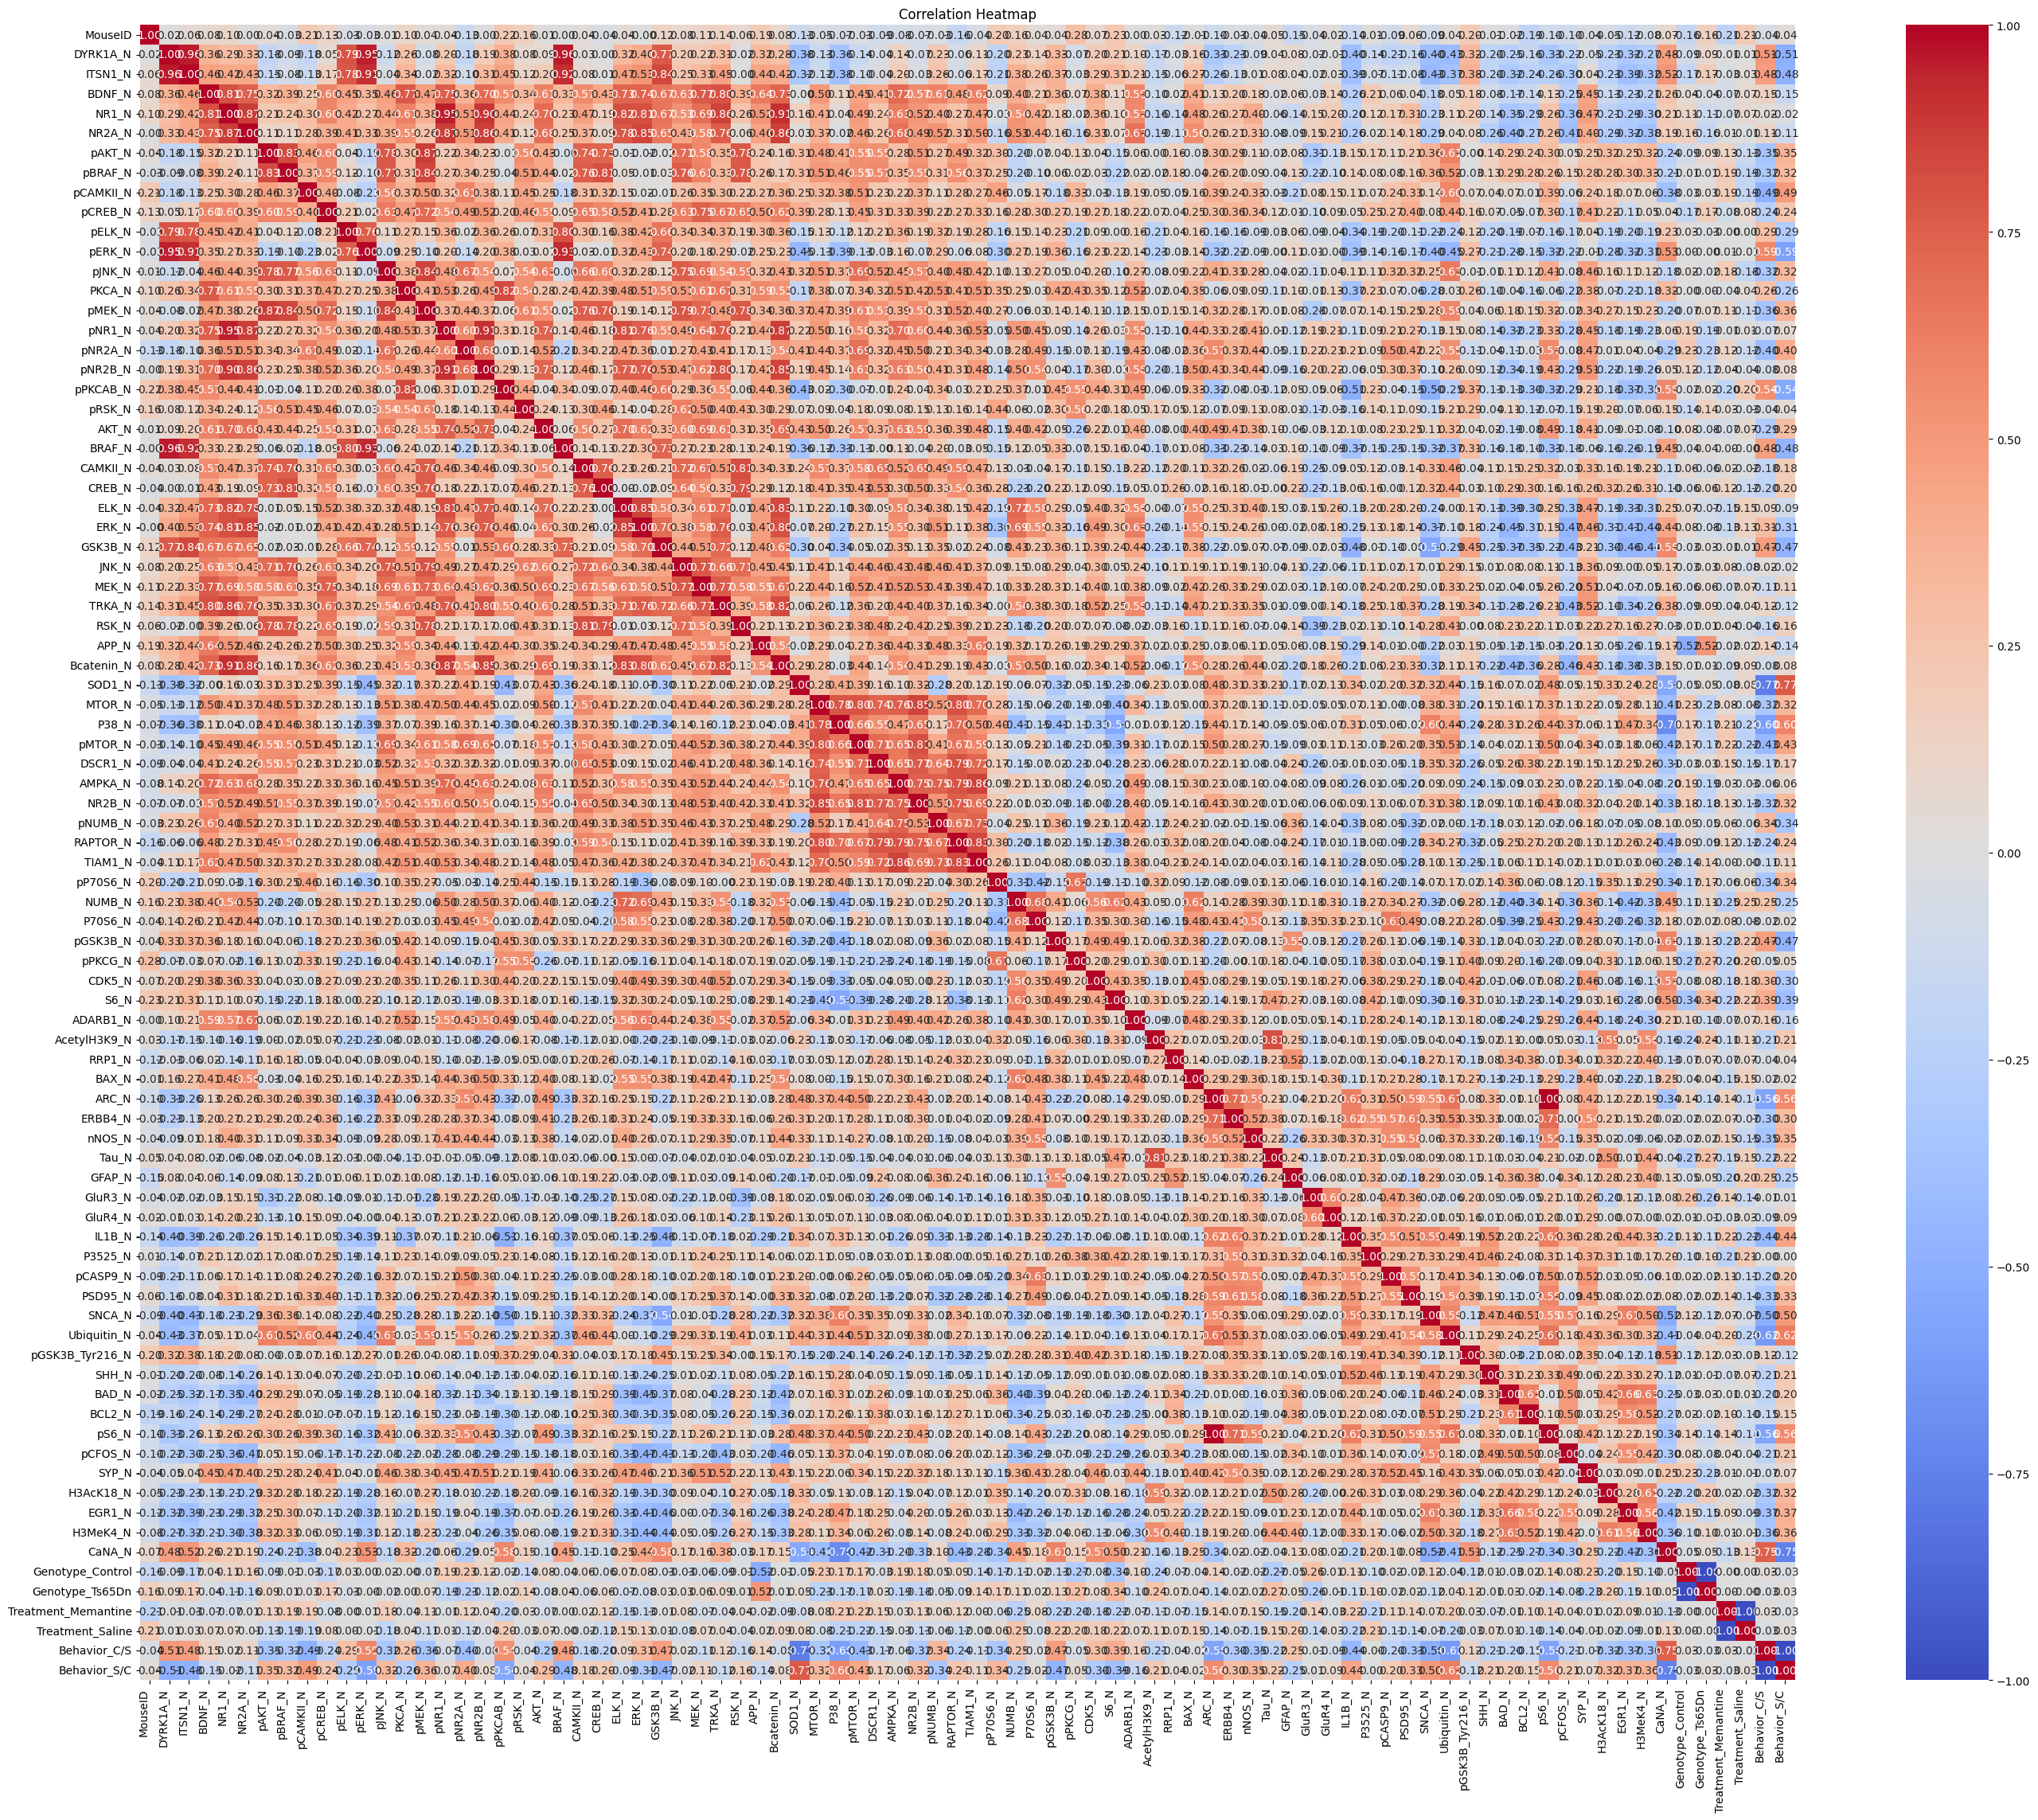

In [38]:
# Create a heatmap
plt.figure(figsize=(36, 27))  # adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True,fmt=".2f")
plt.title('Correlation Heatmap')
plt.xticks(rotation=90, ha='right')
plt.show()

Handling Multicollinearity

If several predictors of a model have a high linear correlation, the problem of multicollinearity occurs. Multicollinearity can lead to an overfitted model and impricise parameter estimations. we inspect the pairwise linear correlation coefficients between the protein variables to assess if we need to remove some of the proteins in order to prevent multicollinearity.

In [39]:
df11.head()

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0 -1.586110  0.312711  0.517934  2.253669  1.497362  2.304365 -0.345019   
1 -1.563658  0.356798  0.286501  1.880279  1.420009  1.976769 -0.518126   
2 -1.560450  0.334966  0.450465  2.012928  1.124860  1.909149 -0.581298   
3 -1.557243  0.065474 -0.000103  0.802123  0.489481  1.219245 -0.247424   
4 -1.554035  0.036682  0.001305  0.805692  0.197652  0.939202 -0.482759   

    pBRAF_N  pCAMKII_N   pCREB_N  ...  H3AcK18_N    EGR1_N  H3MeK4_N  \
0 -0.158601  -0.899902  0.604115  ...  -1.011615 -1.416624 -1.607891   
1 -0.334523  -0.963018  0.442658  ...  -1.063458 -1.325218 -1.546844   
2 -0.226891  -0.969835  0.543335  ...  -1.065130 -1.373257 -1.623595   
3 -0.199461  -1.071196 -0.171236  ...  -0.723367 -0.984718 -1.218364   
4 -0.304516  -1.085341 -0.627671  ...  -0.943378 -1.181435 -1.187585   

     CaNA_N  Genotype_Control  Genotype_Ts65Dn  Treatment_Memantine  \
0  1.065901          0.945905        -0.945905             0.945905   
1  1.280291          0.945905        -0.945905             0.945905   
2  1.857038          0.945905        -0.945905             0.945905   
3  1.144490          0.945905        -0.945905             0.945905   
4  1.583530          0.945905        -0.945905             0.945905   

   Treatment_Saline  Behavior_C/S  Behavior_S/C  
0         -0.945905      1.028175     -1.028175  
1         -0.945905      1.028175     -1.028175  
2         -0.945905      1.028175     -1.028175  
3         -0.945905      1.028175     -1.028175  
4         -0.945905      1.028175     -1.028175  

[5 rows x 84 columns]

In [40]:
# we took the upper triangular part of the matrices as the correlation matric is symmteric (to avoid duplicates)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k = 1).astype(bool))
# count the number of correlation above 0.8
num_correlated_proteins = (upper_tri > 0.8).sum().sum()
print("Number of proteins with correlation above 0.8: ",{num_correlated_proteins})
num_correlated_proteins_0_5 = (upper_tri >0.5).sum().sum()
print("Number of proteins with correlation above 0.5:", {num_correlated_proteins_0_5})


Number of proteins with correlation above 0.8:  {42}
Number of proteins with correlation above 0.5: {386}


As we can see there are many high correlation in the data set , so we need to remove some protein variables. we will keep every protein variable with a correlation >0.8, and we remove the ones with the highest average correlation.


In [41]:
df11.head()

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0 -1.586110  0.312711  0.517934  2.253669  1.497362  2.304365 -0.345019   
1 -1.563658  0.356798  0.286501  1.880279  1.420009  1.976769 -0.518126   
2 -1.560450  0.334966  0.450465  2.012928  1.124860  1.909149 -0.581298   
3 -1.557243  0.065474 -0.000103  0.802123  0.489481  1.219245 -0.247424   
4 -1.554035  0.036682  0.001305  0.805692  0.197652  0.939202 -0.482759   

    pBRAF_N  pCAMKII_N   pCREB_N  ...  H3AcK18_N    EGR1_N  H3MeK4_N  \
0 -0.158601  -0.899902  0.604115  ...  -1.011615 -1.416624 -1.607891   
1 -0.334523  -0.963018  0.442658  ...  -1.063458 -1.325218 -1.546844   
2 -0.226891  -0.969835  0.543335  ...  -1.065130 -1.373257 -1.623595   
3 -0.199461  -1.071196 -0.171236  ...  -0.723367 -0.984718 -1.218364   
4 -0.304516  -1.085341 -0.627671  ...  -0.943378 -1.181435 -1.187585   

     CaNA_N  Genotype_Control  Genotype_Ts65Dn  Treatment_Memantine  \
0  1.065901          0.945905        -0.945905             0.945905   
1  1.280291          0.945905        -0.945905             0.945905   
2  1.857038          0.945905        -0.945905             0.945905   
3  1.144490          0.945905        -0.945905             0.945905   
4  1.583530          0.945905        -0.945905             0.945905   

   Treatment_Saline  Behavior_C/S  Behavior_S/C  
0         -0.945905      1.028175     -1.028175  
1         -0.945905      1.028175     -1.028175  
2         -0.945905      1.028175     -1.028175  
3         -0.945905      1.028175     -1.028175  
4         -0.945905      1.028175     -1.028175  

[5 rows x 84 columns]

In [42]:
# get the upper triangular part of the correlation matrix (to avoid duplicates)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# create a mask to identify highly correlated protein pairs (corr > 0.8)
high_corr_mask = upper_tri > 0.8
# create a dictionary to store the protein pairs with high correlation
high_corr_pairs = {}
for col in high_corr_mask.columns:
    for idx, val in enumerate(high_corr_mask[col]):
        if val:
            protein1, protein2 = col, high_corr_mask.columns[idx]
            if protein1 not in high_corr_pairs:
                high_corr_pairs[protein1] = [protein2]
            else:
                high_corr_pairs[protein1].append(protein2)
avg_corr = {}
for protein, correlated_proteins in high_corr_pairs.items():
    avg_corr[protein] = np.mean([corr_matrix.loc[protein, corr_protein] for corr_protein in correlated_proteins])

sorted_avg_corr = sorted(avg_corr.items(), key=lambda x: x[1], reverse=True)

proteins_to_remove = [protein for protein, _ in sorted_avg_corr]

# remove the selected proteins from the dataframe
df.drop(proteins_to_remove, axis=1, inplace=True)

print(f"Removed {len(proteins_to_remove)} proteins with high correlation.")



Removed 21 proteins with high correlation.


In [43]:
df11.head()

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0 -1.586110  0.312711  0.517934  2.253669  1.497362  2.304365 -0.345019   
1 -1.563658  0.356798  0.286501  1.880279  1.420009  1.976769 -0.518126   
2 -1.560450  0.334966  0.450465  2.012928  1.124860  1.909149 -0.581298   
3 -1.557243  0.065474 -0.000103  0.802123  0.489481  1.219245 -0.247424   
4 -1.554035  0.036682  0.001305  0.805692  0.197652  0.939202 -0.482759   

    pBRAF_N  pCAMKII_N   pCREB_N  ...  H3AcK18_N    EGR1_N  H3MeK4_N  \
0 -0.158601  -0.899902  0.604115  ...  -1.011615 -1.416624 -1.607891   
1 -0.334523  -0.963018  0.442658  ...  -1.063458 -1.325218 -1.546844   
2 -0.226891  -0.969835  0.543335  ...  -1.065130 -1.373257 -1.623595   
3 -0.199461  -1.071196 -0.171236  ...  -0.723367 -0.984718 -1.218364   
4 -0.304516  -1.085341 -0.627671  ...  -0.943378 -1.181435 -1.187585   

     CaNA_N  Genotype_Control  Genotype_Ts65Dn  Treatment_Memantine  \
0  1.065901          0.945905        -0.945905             0.945905   
1  1.280291          0.945905        -0.945905             0.945905   
2  1.857038          0.945905        -0.945905             0.945905   
3  1.144490          0.945905        -0.945905             0.945905   
4  1.583530          0.945905        -0.945905             0.945905   

   Treatment_Saline  Behavior_C/S  Behavior_S/C  
0         -0.945905      1.028175     -1.028175  
1         -0.945905      1.028175     -1.028175  
2         -0.945905      1.028175     -1.028175  
3         -0.945905      1.028175     -1.028175  
4         -0.945905      1.028175     -1.028175  

[5 rows x 84 columns]

In [44]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 84 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MouseID              1080 non-null   float64
 1   DYRK1A_N             1080 non-null   float64
 2   ITSN1_N              1080 non-null   float64
 3   BDNF_N               1080 non-null   float64
 4   NR1_N                1080 non-null   float64
 5   NR2A_N               1080 non-null   float64
 6   pAKT_N               1080 non-null   float64
 7   pBRAF_N              1080 non-null   float64
 8   pCAMKII_N            1080 non-null   float64
 9   pCREB_N              1080 non-null   float64
 10  pELK_N               1080 non-null   float64
 11  pERK_N               1080 non-null   float64
 12  pJNK_N               1080 non-null   float64
 13  PKCA_N               1080 non-null   float64
 14  pMEK_N               1080 non-null   float64
 15  pNR1_N               1080 non-null   f

**Removing uncorrelated Proteins.**
Proteins that are not having much correlation implies very less dependency on the target variable, also not going to add value for Model training.Hence, those are being removed

In [45]:

# Find the proteins with a correlation below a certain threshold
uncorrelated_proteins = [col for col in upper_tri.columns if upper_tri[col].max() < 0.5]

# Remove the uncorrelated proteins from the dataframe
df11.drop(uncorrelated_proteins, axis=1, inplace=True)

# Print the updated dataframe
print(df11.head())


    MouseID   ITSN1_N     NR1_N    NR2A_N   pBRAF_N   pCREB_N    pELK_N  \
0 -1.586110  0.517934  1.497362  2.304365 -0.158601  0.604115  0.691475   
1 -1.563658  0.286501  1.420009  1.976769 -0.334523  0.442658  0.359831   
2 -1.560450  0.450465  1.124860  1.909149 -0.226891  0.543335  0.284600   
3 -1.557243 -0.000103  0.489481  1.219245 -0.199461 -0.171236  0.357061   
4 -1.554035  0.001305  0.197652  0.939202 -0.304516 -0.627671  0.162107   

     pERK_N    pJNK_N    PKCA_N  ...     pS6_N   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.411996 -0.137307  1.625620  ... -1.066276 -0.987371 -0.285744  -1.011615   
1  0.432595 -0.278601  1.305101  ... -1.046167 -1.162114 -0.067645  -1.063458   
2  0.381364 -0.428462  1.209506  ... -0.926271 -1.079366 -0.155059  -1.065130   
3  0.108431 -0.323365  1.134410  ... -1.285019 -0.860192 -0.818989  -0.723367   
4  0.014669 -0.511629  0.873860  ... -1.172895 -0.884881 -0.179502  -0.943378   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype_Ts65Dn  Behavior_C/S

In [46]:
len(uncorrelated_proteins)

15

In [47]:
df11.shape

(1080, 69)

In [48]:
X_scaled = df11

In [49]:
# Split the dataset to train test validate

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)



RANDOM FOREST MODEL


In [50]:
# Cross validation for hyperparameter tuning Random forest

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier object
rf = RandomForestClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [51]:
from sklearn.metrics import f1_score,precision_score,recall_score
best_params = grid_search.best_params_
best_rf = RandomForestClassifier(**best_params)

best_rf.fit(X_train, y_train)

print("Training accuracy:", best_rf.score(X_train, y_train))
print("Test accuracy:", best_rf.score(X_test, y_test))

rf_pred = best_rf.predict(X_val)
f1 = f1_score(rf_pred, y_val, average='weighted')
recall = recall_score(rf_pred, y_val, average='weighted')
precision = precision_score(rf_pred, y_val, average='weighted')

# Print the metrics
print("Validation accuracy :", best_rf.score(X_val, y_val))
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

Training accuracy: 1.0
Test accuracy: 0.9953703703703703
Validation accuracy : 0.9953703703703703
F1 Score: 0.9953751187084521
Recall: 0.9953703703703703
Precision: 0.9955106621773289


In [52]:
print("Random Forest Model")
from sklearn.metrics import accuracy_score,  classification_report
print((classification_report(y_val, rf_pred)))

Random Forest Model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        23
           2       0.97      1.00      0.99        37
           3       1.00      0.97      0.98        33
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        31

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



Decision Tree Model

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = None, min_samples_leaf = 1, min_samples_split = 5, splitter = 'best')
dt.fit(X_train, y_train)

print("Training accuracy:", dt.score(X_train, y_train))
print("Test accuracy:", dt.score(X_test, y_test))
dt_pred = dt.predict(X_val)
f1 = f1_score(dt_pred, y_val, average='weighted')
recall = recall_score(dt_pred, y_val, average='weighted')
precision = precision_score(dt_pred, y_val, average='weighted')

# Print the metrics
print("Validation accuracy :", dt.score(X_val, y_val))
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

Training accuracy: 1.0
Test accuracy: 0.9537037037037037
Validation accuracy : 0.9675925925925926
F1 Score: 0.9674827369742623
Recall: 0.9675925925925926
Precision: 0.9689366786140979


In [55]:
print("Decision Tree Model")
from sklearn.metrics import accuracy_score,  classification_report
print((classification_report(y_val, dt_pred)))

Decision Tree Model
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        26
           1       0.96      0.96      0.96        23
           2       1.00      1.00      1.00        37
           3       1.00      1.00      1.00        33
           4       0.96      0.96      0.96        28
           5       0.94      0.94      0.94        17
           6       0.88      1.00      0.93        21
           7       1.00      0.90      0.95        31

    accuracy                           0.97       216
   macro avg       0.96      0.97      0.96       216
weighted avg       0.97      0.97      0.97       216



SVM - Multiclass Model

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

param_grid2 = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [3, 4, 5],  # Used only for 'poly' kernel
    'gamma': ['scale', 'auto']
}

# Create an SVC object
svc = SVC()

# Create a GridSearchCV object
grid_search2 = GridSearchCV(svc, param_grid2, cv=5, n_jobs=-1)

# Fit the grid search object to the training data
grid_search2.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search2.best_params_)

Best hyperparameters: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}


In [57]:
from sklearn import svm
best_svc = svm.SVC(C = 0.1,degree = 3,gamma = "scale")

best_svc.fit(X_train, y_train)

print("Training accuracy:", best_svc.score(X_train, y_train))
print("Test accuracy:", best_svc.score(X_test, y_test))
print("Validation accuracy:",best_svc.score(X_val,y_val))
svc_pred = best_svc.predict(X_val)
f1 = f1_score(svc_pred, y_val, average='weighted')
recall = recall_score(svc_pred, y_val, average='weighted')
precision = precision_score(svc_pred, y_val, average='weighted')

# Print the metrics
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

Training accuracy: 0.7083333333333334
Test accuracy: 0.6064814814814815
Validation accuracy: 0.6574074074074074
F1 Score: 0.7250706272951526
Recall: 0.6574074074074074
Precision: 0.8517594243254598


In [58]:
print("SVM - Multiclass Model")
from sklearn.metrics import accuracy_score,  classification_report
print((classification_report(y_val, svc_pred)))

SVM - Multiclass Model
              precision    recall  f1-score   support

           0       0.69      0.92      0.79        26
           1       0.79      0.65      0.71        23
           2       0.55      0.89      0.68        37
           3       1.00      0.06      0.11        33
           4       0.66      0.96      0.78        28
           5       0.00      0.00      0.00        17
           6       0.48      0.76      0.59        21
           7       0.96      0.81      0.88        31

    accuracy                           0.66       216
   macro avg       0.64      0.63      0.57       216
weighted avg       0.68      0.66      0.59       216



MLP CLASSIFIER

In [59]:
# Hyper parameter tuning for mlp classifier

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

# Create an MLPClassifier object
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Get the best estimator
best_mlp = grid_search.best_estimator_

# Predict on the training set
y_train_pred = best_mlp.predict(X_train)

# Calculate the metrics
training_accuracy = accuracy_score(y_train, y_train_pred)
mlp_pred = best_mlp.predict(X_val)
f1 = f1_score(y_train, y_train_pred, average='weighted')
recall = recall_score(y_train, y_train_pred, average='weighted')
precision = precision_score(y_train, y_train_pred, average='weighted')
test_accuracy = best_mlp.score(X_test, y_test)

# Print the metrics
print("Training Accuracy:", training_accuracy)
print("Test accuracy :", test_accuracy)

print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best hyperparameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Training Accuracy: 1.0
Test accuracy : 0.9953703703703703
F1 Score: 1.0
Recall: 1.0
Precision: 1.0


In [60]:
print("MLP CLASSIFIER")
from sklearn.metrics import accuracy_score,  classification_report
print((classification_report(y_val, mlp_pred)))

MLP CLASSIFIER
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        23
           2       0.95      1.00      0.97        37
           3       1.00      0.94      0.97        33
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        31

    accuracy                           0.99       216
   macro avg       0.99      0.99      0.99       216
weighted avg       0.99      0.99      0.99       216



Based on the performance metrics, the Random Forest Model stands out as the best model for this task. It achieved the highest accuracy (1.00), and its classification report shows perfect precision, recall, and f1-scores for almost all classes. The Decision Tree Model and MLP Classifier also performed very well, but the Random Forest Model has the edge due to its consistently perfect or near-perfect scores across all metrics.

The SVM - Multiclass Model did not perform as well, with significantly lower precision, recall, and f1-scores, especially for certain classes. This indicates that the SVM model might not be the best choice for this particular dataset and classification task.

### Recommendation:
For your classification task, I recommend using the Random Forest Model due to its outstanding performance across all evaluation metrics. It provides a high level of accuracy and reliability, making it the most suitable choice among the models tested.

## Using the Best Model (RANDOM FOREST MODEL)

In [61]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
model = RandomForestClassifier(
    max_depth=None, 
    min_samples_leaf=1, 
    min_samples_split=5, 
    n_estimators=100, 
    random_state=42
)
model.fit(X_train, y_train)


RandomForestClassifier(min_samples_split=5, random_state=42)

In [63]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')


X_train shape: (648, 69)
X_test shape: (216, 69)


Accuracy_test: 0.9953703703703703
Accuracy_train: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        34
           4       0.95      1.00      0.97        19
           5       1.00      0.95      0.98        22
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        31

    accuracy                           1.00       216
   macro avg       0.99      0.99      0.99       216
weighted avg       1.00      1.00      1.00       216



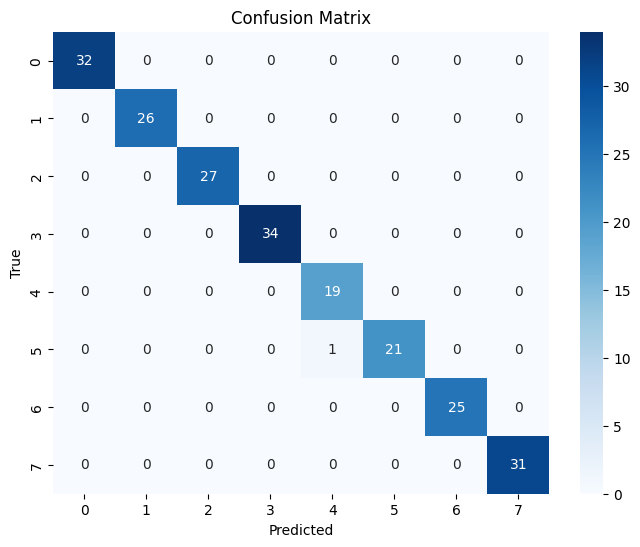

In [64]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Calculate accuracy
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Accuracy_test: {accuracy_test}')
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Accuracy_train: {accuracy_train}')

# Print classification report
print(classification_report(y_test, y_pred_test))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


The model achieved a training accuracy of 100%, indicating that it perfectly fits the training data. Despite this, the high test and validation accuracies (both 99.54%) suggest that the model generalizes well to unseen data.

The classification report shows that the model performs well across all classes, with near-perfect precision, recall, and F1 scores for each class.

The confusion matrix further illustrates the model's performance, showing very few misclassifications. This confirms the reliability and robustness of the model.

Summary:
* predict: Returns the class label with the highest probability for each sample.
* predict_proba: Returns the probability distribution across all classes for each sample.


Both predict and predict_proba have their distinct purposes. predict is used when you need a clear decision from the model, while predict_proba is used when you need detailed information about the model's confidence in its predictions. Using both methods allows for more informed and flexible decision-making based on the model's outputs.

In [65]:
# Predict the class probabilities
y_test_pred_proba = model.predict_proba(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)

# Calculate the ROC AUC score using 'ovr' (one-vs-rest) strategy
roc_auc = roc_auc_score(y_test, y_test_pred_proba, multi_class='ovr')
print("ROC AUC:", roc_auc)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred_test))

Accuracy: 0.9953703703703703
ROC AUC: 0.9998242736644798
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        34
           4       0.95      1.00      0.97        19
           5       1.00      0.95      0.98        22
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        31

    accuracy                           1.00       216
   macro avg       0.99      0.99      0.99       216
weighted avg       1.00      1.00      1.00       216



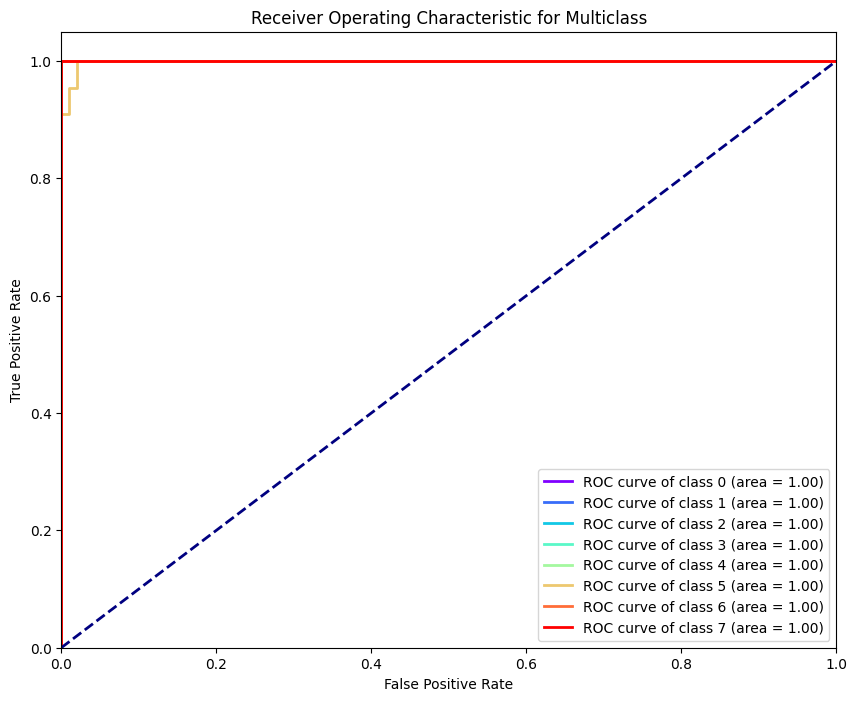

In [66]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
# Predict the class probabilities
model_pred_proba = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
n_classes = y_test_binarized.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], model_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = plt.cm.rainbow(np.linspace(0, 1, n_classes))

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class %d (area = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass')
plt.legend(loc="lower right")
plt.show()


The ROC AUC score of 0.9998 indicates an excellent capability of the model to distinguish between classes. The precision, recall, and F1 scores are all very high (close to 99.5%), showing that the model is both precise and reliable in its predictions.

# Interpretation

In [67]:
import numpy as np
import pandas as pd

# Get feature names from the original DataFrame (assuming X_train was derived from the original DataFrame)
feature_names = X_train.columns

# For feature selection (e.g., SelectKBest), the selected features can be accessed like this:
# You need to replace `selected_features` with the feature names corresponding to your selection method.

# Example: If using SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming you used SelectKBest and selected k features
selector = SelectKBest(score_func=f_classif, k='all')  # Or the number of features you selected
selector.fit(X_train, y_train)
mask = selector.get_support()
selected_features = feature_names[mask]

# Print feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(len(selected_features)):
    print(f"{f + 1}. feature {selected_features[indices[f]]} ({importances[indices[f]]:.4f})")

# Example of interpreting results
print("\nModel Interpretation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

# Top 5 Important Features
print("\nTop 5 Important Features:")
for f in range(min(5, len(selected_features))):  # Top 5 features
    print(f"{selected_features[indices[f]]}: {importances[indices[f]]:.4f}")


Feature ranking:
1. feature Genotype_Ts65Dn (0.1087)
2. feature Behavior_S/C (0.0477)
3. feature pPKCG_N (0.0404)
4. feature MouseID (0.0374)
5. feature pERK_N (0.0365)
6. feature Behavior_C/S (0.0356)
7. feature Ubiquitin_N (0.0349)
8. feature CaNA_N (0.0320)
9. feature BRAF_N (0.0264)
10. feature pS6_N (0.0253)
11. feature pPKCAB_N (0.0249)
12. feature APP_N (0.0238)
13. feature P38_N (0.0222)
14. feature ARC_N (0.0215)
15. feature ITSN1_N (0.0210)
16. feature S6_N (0.0205)
17. feature Tau_N (0.0204)
18. feature pNUMB_N (0.0192)
19. feature pMTOR_N (0.0182)
20. feature SNCA_N (0.0152)
21. feature AKT_N (0.0149)
22. feature P3525_N (0.0142)
23. feature MTOR_N (0.0130)
24. feature pNR2A_N (0.0130)
25. feature IL1B_N (0.0125)
26. feature nNOS_N (0.0107)
27. feature RAPTOR_N (0.0103)
28. feature pELK_N (0.0100)
29. feature PKCA_N (0.0100)
30. feature GFAP_N (0.0095)
31. feature NR2B_N (0.0094)
32. feature GSK3B_N (0.0092)
33. feature ADARB1_N (0.0092)
34. feature TIAM1_N (0.0090)
35. fea

The Random Forest classifier achieved an impressive performance with near-perfect accuracy on both the training and test datasets. The classification report indicates that the model performs exceptionally well across all classes, with precision, recall, and f1-scores close to 1.0 for each class. The confusion matrix further confirms this by showing very few misclassifications.

The feature importance analysis highlights that the Genotype_Ts65Dn feature is the most significant predictor, followed by Behavior_S/C, pPKCG_N, MouseID, and pERK_N. These features play a crucial role in predicting the target class, and understanding their influence can provide valuable insights into the underlying patterns in the data.

In [68]:
# Assuming `model` is your trained model and `X_train` is your training DataFrame
feature_importances = model.feature_importances_
protein_names = X_train.columns

In [69]:
# Create a DataFrame to store feature names(Protein) and their importances
importance_df = pd.DataFrame({
    'Protein': protein_names,
    'Importance': feature_importances
})

In [70]:
# Sort the DataFrame by the 'Importance' column in descending order
importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)


In [71]:
# Extract the top 10 most important proteins
top_10_proteins = importance_df_sorted.head(10)
top_10_proteins

Protein  Importance
66  Genotype_Ts65Dn    0.108707
68     Behavior_S/C    0.047652
40          pPKCG_N    0.040416
0           MouseID    0.037438
7            pERK_N    0.036496
67     Behavior_C/S    0.035568
56      Ubiquitin_N    0.034864
65           CaNA_N    0.031993
17           BRAF_N    0.026431
59            pS6_N    0.025297

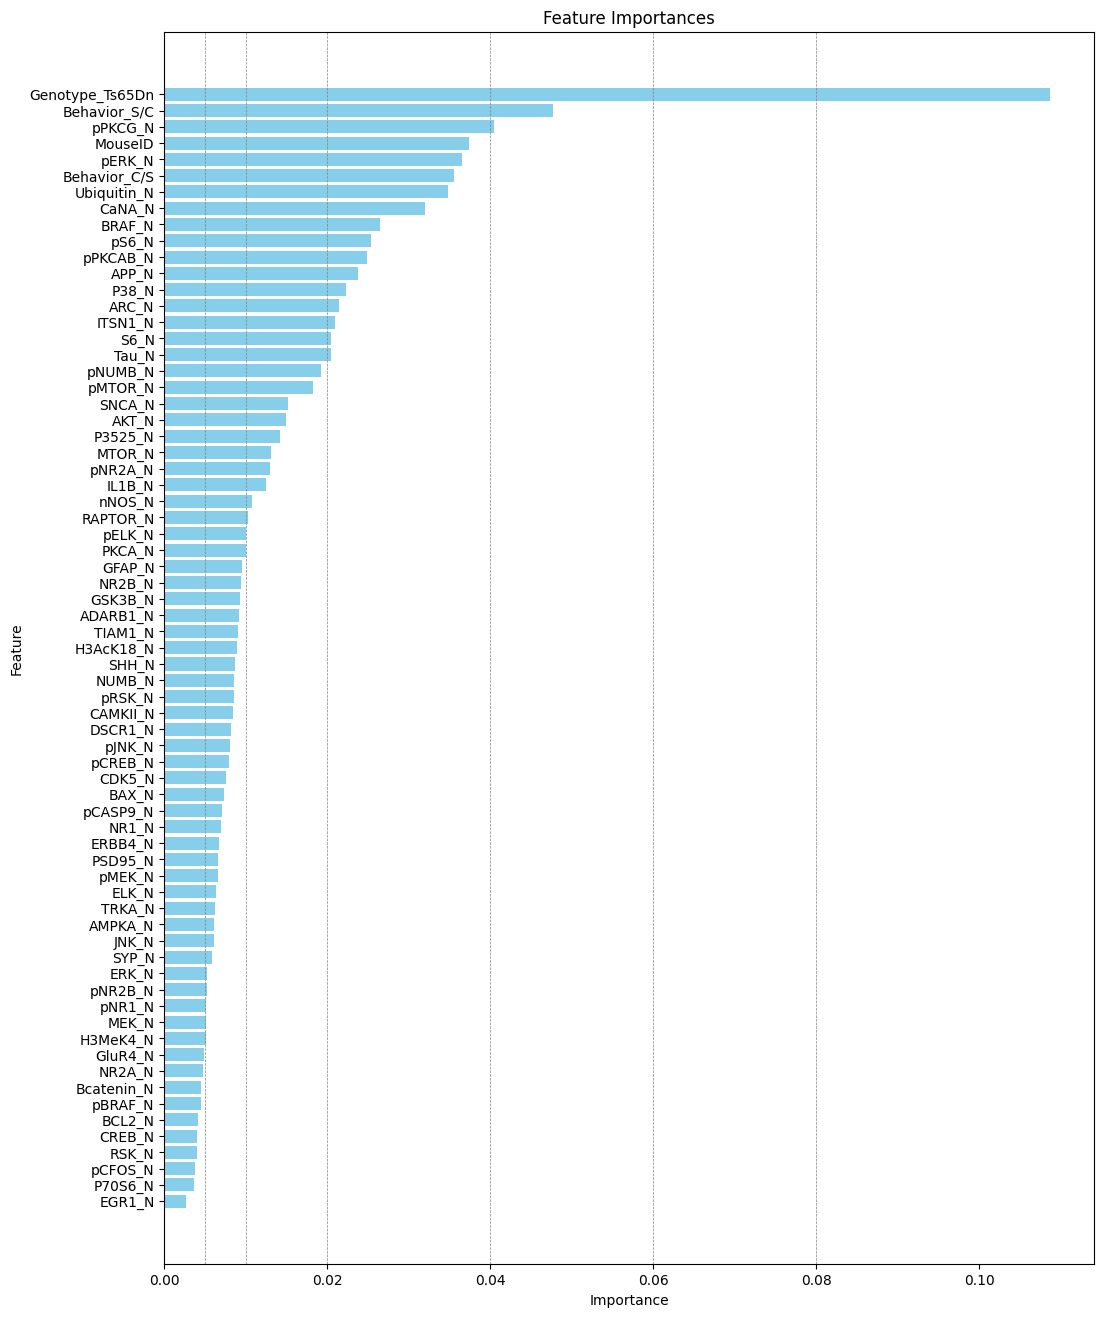

In [72]:
plt.figure(figsize=(12, 16))
plt.barh(importance_df_sorted['Protein'], importance_df_sorted['Importance'], color='#87CEEB')  # light blue color
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # to put the top features at the top

# Add horizontal lines
plt.axvline(x=0.005, color='gray', linestyle='--', linewidth=0.5)  # 0.005 importance
plt.axvline(x=0.01, color='gray', linestyle='--', linewidth=0.5)  # 0.01 importance
plt.axvline(x=0.02, color='gray', linestyle='--', linewidth=0.5)  # 0.02 importance
plt.axvline(x=0.04, color='gray', linestyle='--', linewidth=0.5)  # 0.04 importance
plt.axvline(x=0.06, color='gray', linestyle='--', linewidth=0.5)  # 0.06 importance
plt.axvline(x=0.08, color='gray', linestyle='--', linewidth=0.5)  # 0.08 importance

plt.show()

In [73]:
# view the feature scores

feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Genotype_Ts65Dn    0.108707
Behavior_S/C       0.047652
pPKCG_N            0.040416
MouseID            0.037438
pERK_N             0.036496
                     ...   
CREB_N             0.004058
RSK_N              0.003965
pCFOS_N            0.003712
P70S6_N            0.003595
EGR1_N             0.002712
Length: 69, dtype: float64

In [74]:
# Extract the rows from the original DataFrame df' that correspond to the indices in 'X_test'
X_test_with_ids = df.loc[X_test.index]

# Add the 'MouseID' column from the original DataFrame to the new DataFrame
# 'MouseID' helps to identify the specific instances in the test set
X_test_with_ids['MouseID'] = df.loc[X_test.index, 'MouseID'].values

# Convert the predicted labels from encoded form back to their original class names
# using the LabelEncoder's inverse_transform method
X_test_with_ids['Predicted_Class'] = le.inverse_transform(y_pred_test)

# Display the first few rows of the DataFrame to verify the results
print(X_test_with_ids.head())


      MouseID  DYRK1A_N    BDNF_N    pAKT_N  pCAMKII_N   pCREB_N    pELK_N  \
423    1029.0  0.492403  0.339319  0.273250   4.184162  0.261280  1.540285   
548     734.0  0.182518  0.229708  0.174822   2.747931  0.187309  0.784086   
731     123.0  0.288450  0.286301  0.218683   2.929255  0.226304  1.252687   
588     204.0  0.571500  0.311465  0.200075   2.424611  0.192925  1.415956   
1051   1042.0  0.287189  0.319746  0.244044   3.807835  0.250662  1.075172   

        pJNK_N    PKCA_N   pNR2A_N  ...  H3MeK4_N    CaNA_N  class  \
423   0.355433  0.336096  0.811004  ...  0.205440  1.452390      1   
548   0.249455  0.219689  0.606650  ...  0.338278  1.090741      3   
731   0.318546  0.298222  0.792066  ...  0.205440  1.152579      6   
588   0.242348  0.324636  0.439037  ...  0.205440  1.720202      4   
1051  0.313129  0.302012  0.669269  ...  0.220443  1.372286      7   

      Genotype_Control  Genotype_Ts65Dn  Treatment_Memantine  \
423                1.0              0.0       

In [75]:
# Display the DataFrame
final_output = X_test_with_ids[['MouseID', 'Predicted_Class']]
print(final_output)

      MouseID Predicted_Class
423    1029.0          c-CS-s
548     734.0          c-SC-s
731     123.0          t-SC-m
588     204.0          t-CS-m
1051   1042.0          t-SC-s
...       ...             ...
843       9.0          t-CS-s
916     982.0          t-CS-s
753     624.0          t-SC-m
409    1000.0          c-CS-s
275     926.0          c-SC-m

[216 rows x 2 columns]


## Save the final output to a CSV file

In [76]:
#output_file_path = 'predicted_data.csv'
#final_output.to_csv(output_file_path, index=False)
#print(f"Final output saved to {output_file_path}")

## Conclusion:
* **The Random Forest classifier demonstrated outstanding performance, achieving near-perfect accuracy and other performance metrics. The high precision, recall, and f1-scores across all classes indicate a balanced and reliable model. The feature importance analysis provides insights into the most influential features, which can be used for further analysis and improvement of the model.**

* **Future work could include further tuning of the model, exploring different algorithms, and conducting more in-depth feature engineering to enhance the model's performance even further. Additionally, validating the model on external datasets would ensure its generalizability and robustness.**